# Objective

Predicting the risk of coronary Heart disease in the next 10 years for a person based on their demographics, past and current medical conditions.

# Dataset Description

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
%config InlineBackend.figure_format ='retina'
%matplotlib inline

# Importing Dataset

In [4]:
df = pd.read_csv("framingham.csv")
df.head(10)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


In [5]:
df.shape

(4240, 16)

In [6]:
df.dtypes

male                 int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

# Data Preprocessing

In [7]:
#Finding duplicate data
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4235    False
4236    False
4237    False
4238    False
4239    False
Length: 4240, dtype: bool

There are no duplicated rows in the imported dataset.

In [8]:
#Finding missing data values in the dataset
df.isna().sum()
null_values = df[df.isna().any(axis=1)]
null_values

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
14,0,39,2.0,1,9.0,0.0,0,0,0,226.0,114.0,64.0,22.35,85.0,NaN,0
21,0,43,1.0,0,0.0,0.0,0,0,0,185.0,123.5,77.5,29.89,70.0,NaN,0
26,0,60,1.0,0,0.0,0.0,0,0,0,260.0,110.0,72.5,26.59,65.0,NaN,0
33,1,61,NaN,1,5.0,0.0,0,0,0,175.0,134.0,82.5,18.59,72.0,75.0,1
36,1,56,NaN,0,0.0,0.0,0,0,0,257.0,153.5,102.0,28.09,72.0,75.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4208,0,51,1.0,1,9.0,0.0,0,0,0,340.0,152.0,76.0,25.74,70.0,NaN,0
4229,0,51,3.0,1,20.0,0.0,0,1,0,251.0,140.0,80.0,25.60,75.0,NaN,0
4230,0,56,1.0,1,3.0,0.0,0,1,0,268.0,170.0,102.0,22.89,57.0,NaN,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0


In [9]:
#Dropping missing data rows
df = df.dropna()
df.isna().sum()
df.columns

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [10]:
#Finding out outliers in each column
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000
mean,0.443685,49.551941,1.980317,0.489065,9.025424,0.030344,0.005741,0.311646,0.027064,236.847731,132.370558,82.917031,25.782802,75.730727,81.852925,0.152269
std,0.496886,8.562029,1.022656,0.499949,11.921590,0.171557,0.075561,0.463229,0.162292,44.097681,22.086866,11.974258,4.065601,11.981525,23.904164,0.359331
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.080000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,143.875000,90.000000,28.037500,82.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,600.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


Findings:
From the above observations, it can be inferred that Glucose column have some outliers in the data.
So, we have to delete the respective outlier data from our dataset.

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='totChol'>

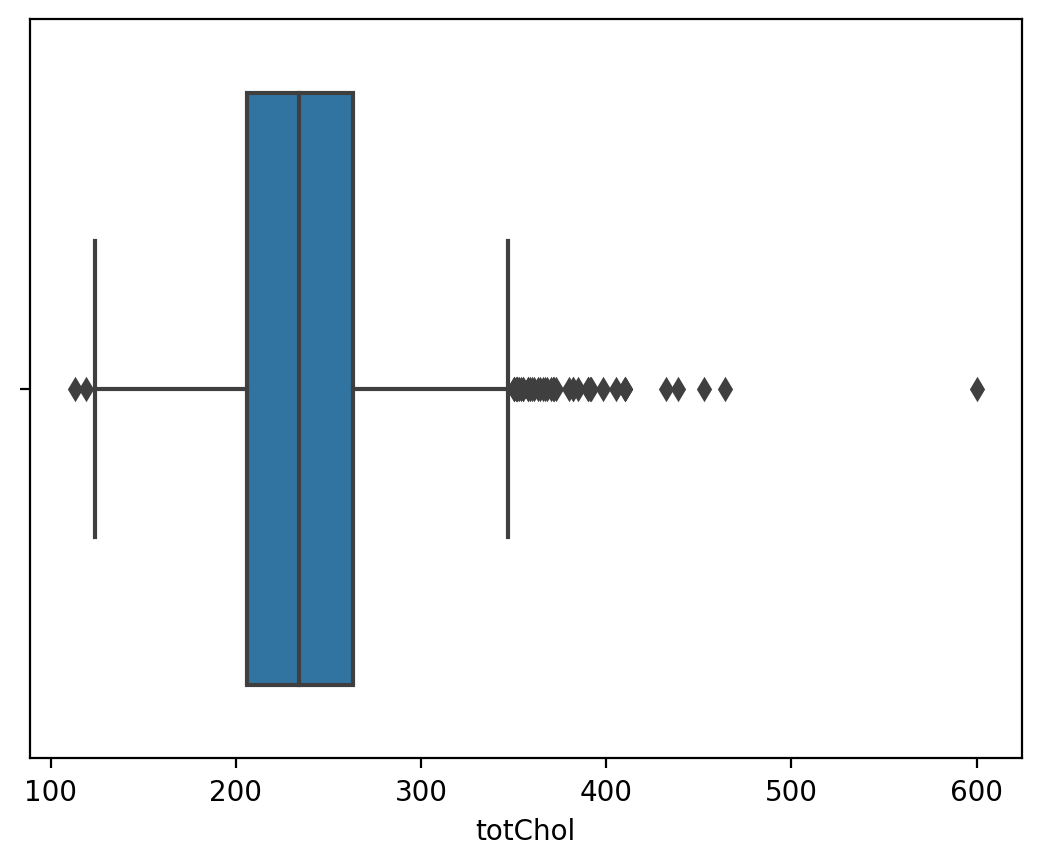

In [11]:
##Zooming into TotalCholestrol columns
sns.boxplot(df.totChol)

In [12]:
#Eliminating outliers from the dataset
df_totChol = df[df.totChol > 500]
df_totChol

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
1111,0,52,2.0,0,0.0,0.0,0,1,1,600.0,159.5,94.0,28.27,78.0,140.0,1


In [13]:
df.drop(df[df.totChol > 500].index)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


<AxesSubplot:>

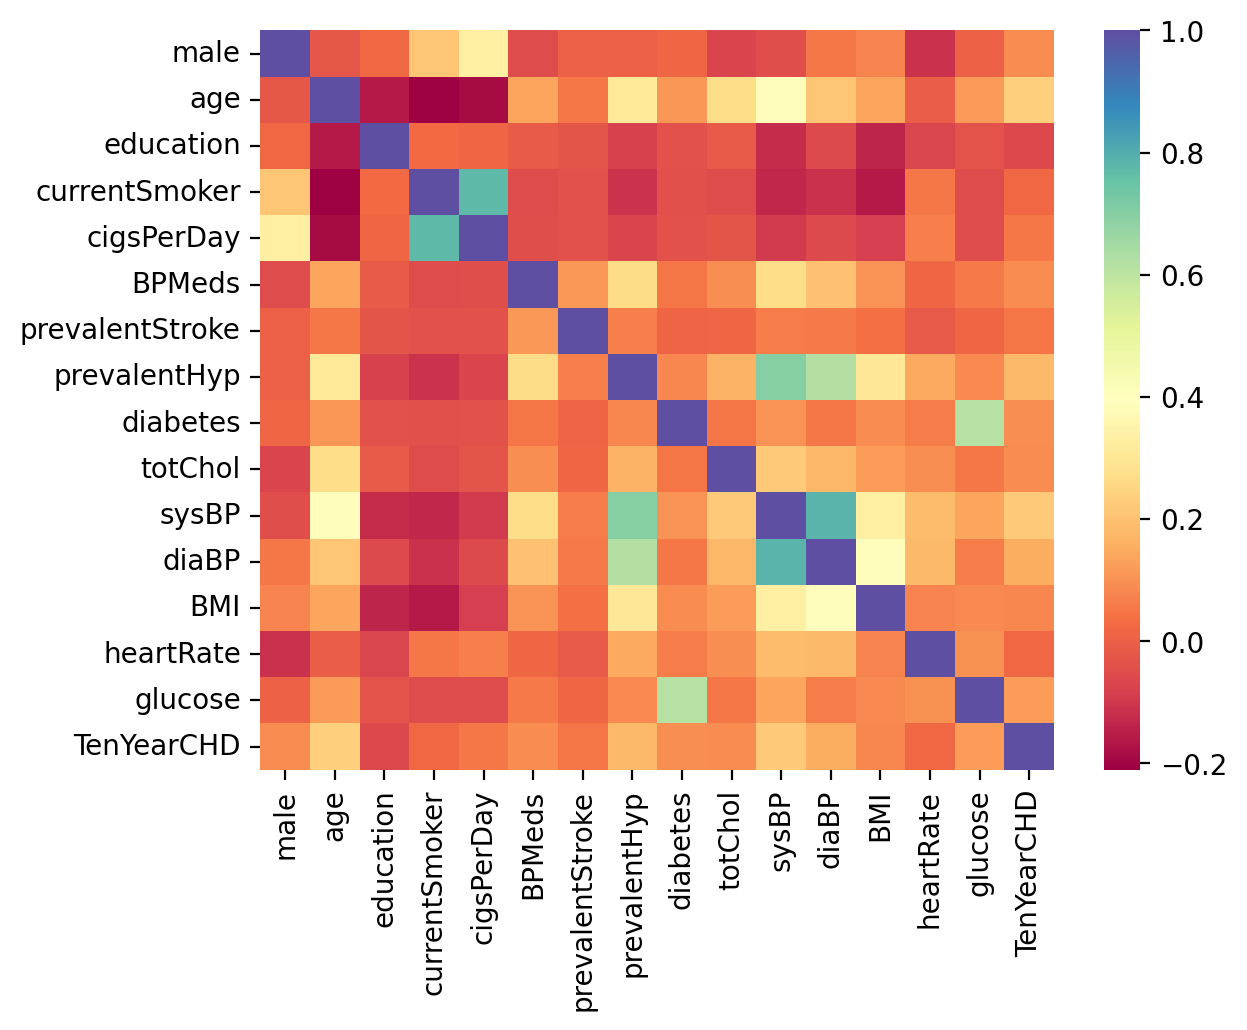

In [14]:
#Finding correlation among predictors and outcome
df_corr = df.corr()
sns.heatmap(df_corr,cmap='Spectral')

Findings:-
    From above heatmap, it can be observed that correlation value between outcome and education is very much less.
    Hence, education column in the dataset will have very less impact on our outcome variable.
    So, Education column need not be considered in our prediction.

In [15]:
# Dropping column education
df = df.drop(['education'], axis=1)

# Test - Train Split

In [16]:
# clarify what is y and what is x label
y = df['TenYearCHD']
X = df.drop(['TenYearCHD'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=29)

In [17]:
X_test.shape

(915, 14)

In [18]:
X_train.shape

(2743, 14)

In [19]:
y_train.value_counts()

0    2332
1     411
Name: TenYearCHD, dtype: int64

# Resampling imbalanced Dataset 

Class 0: 3101
Class 1: 557
Proportion: 5.57 : 1


/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TenYearCHD', ylabel='count'>

Text(0.5, 0, 'Heart Disease No/Yes')

Text(0, 0.5, 'Patient Count')

Text(0.5, 1.0, 'Count Outcome Heart Disease\n')

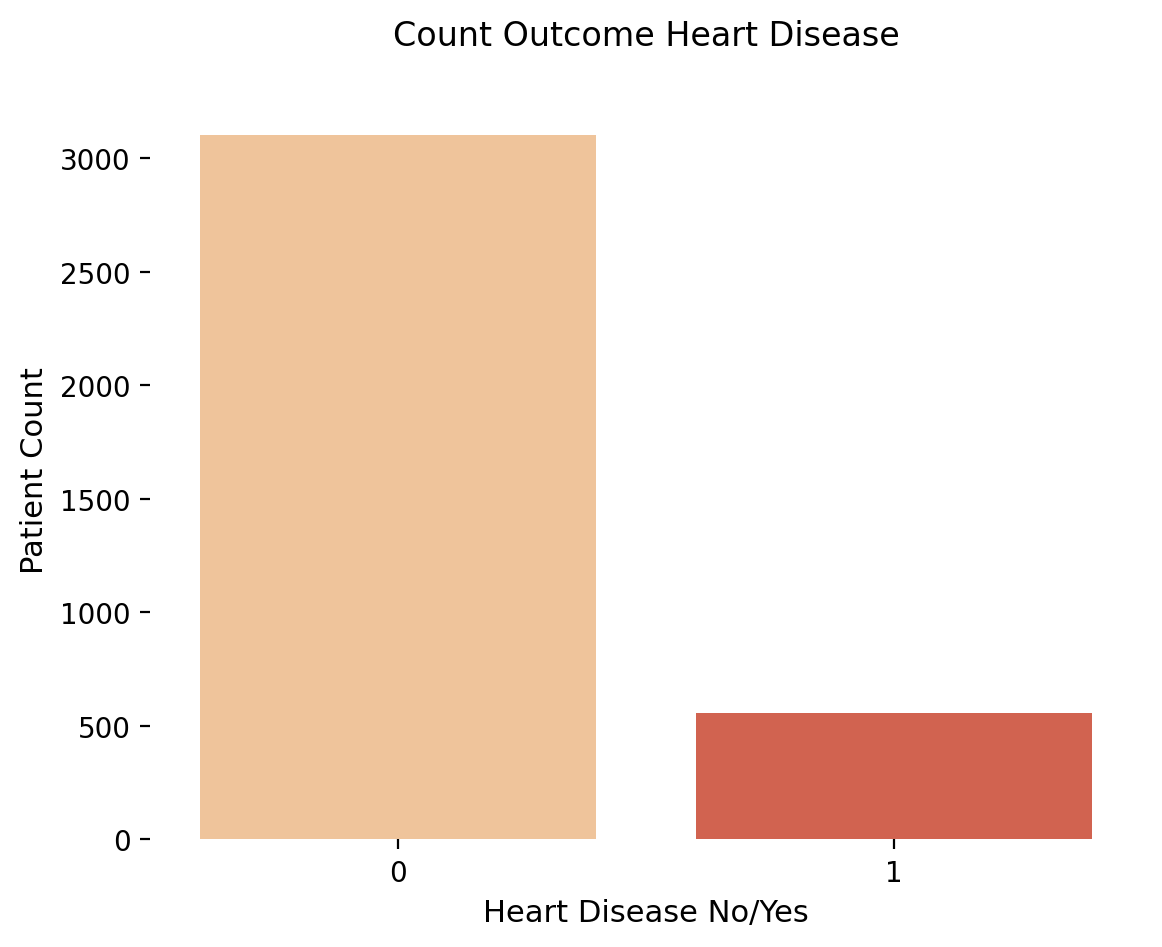

In [20]:
# Checking balance of outcome variable
target_count = df.TenYearCHD.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

sns.countplot(df.TenYearCHD, palette="OrRd")
plt.box(False)
plt.xlabel('Heart Disease No/Yes',fontsize=11)
plt.ylabel('Patient Count',fontsize=11)
plt.title('Count Outcome Heart Disease\n')
plt.show()

We can see that the proportion is 5.57:1 which is not well balanced.
One of the major issues when dealing with unbalanced datasets relates to the metrics used to evaluate a model. Using simpler metrics like accuracy_score can be misleading. In a dataset with highly unbalanced classes, if the classifier always "predicts" the most common class without performing any analysis of the features, it will still have a high accuracy rate, obviously illusory.

# Undersampling Method

Undersampling aims to decrease the number of instances from the overrepresented class in the data set. In our case, these techniques will decrease the number of fraudulent transactions in our data to approximately 50:50. If we do not balance the number of instances, most classification algorithms will heavily focus on the majority class. As a result, it might seem like your algorithm is achieving superb results when, in reality, it is simply always predicting the majority class.

The easiest way to do so is to randomly select observations from the majority class and remove them from the data set until we achieve a balance between the majority and minority class.

0    611
1    557
Name: TenYearCHD, dtype: int64

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TenYearCHD', ylabel='count'>

Text(0.5, 0, 'Heart Disease No/Yes')

Text(0, 0.5, 'Patient Count')

Text(0.5, 1.0, 'Count Outcome Heart Disease after Resampling\n')

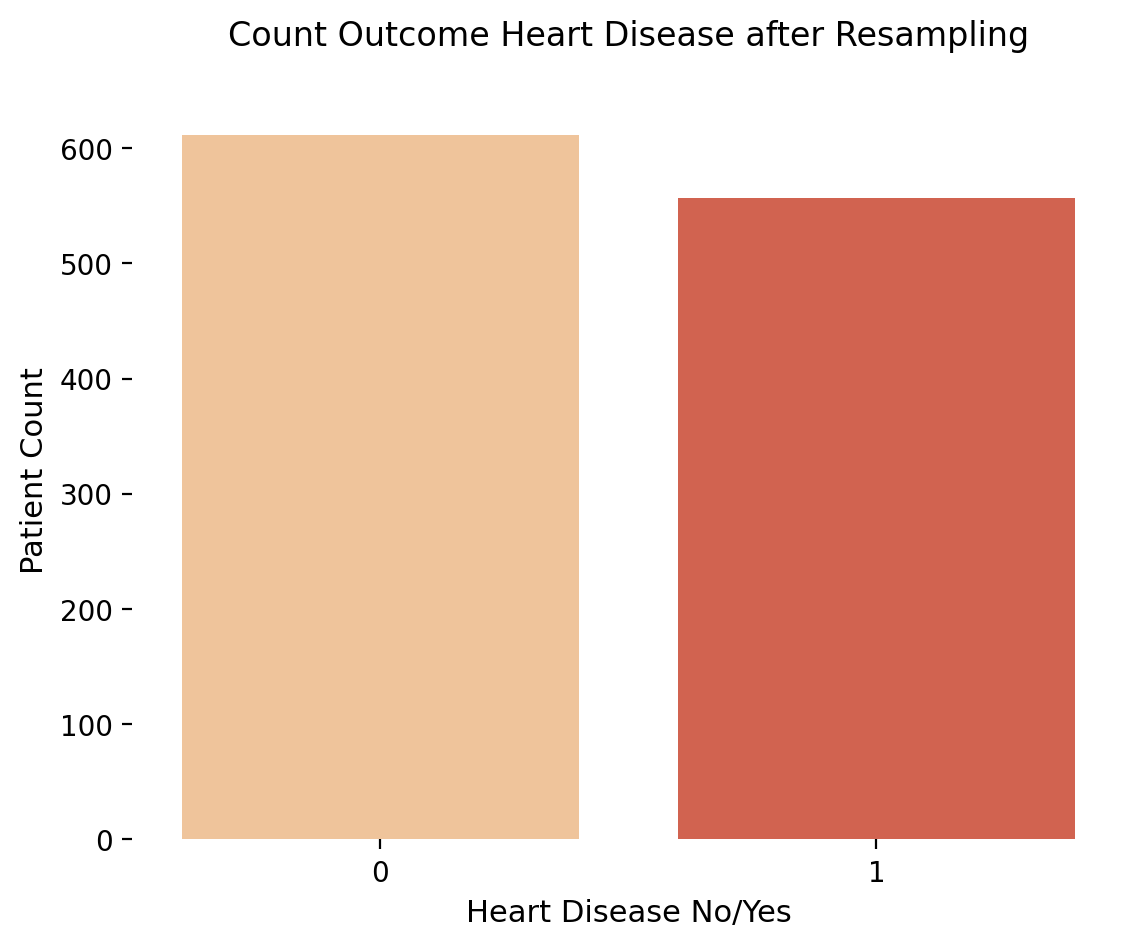

In [21]:
# Shuffle df
shuffled_df = df.sample(frac=1,random_state=4)

# Put all the Risk class in a separate dataset.
CHD_df = shuffled_df.loc[shuffled_df['TenYearCHD'] == 1]

#Randomly selecting 611 observations from No risk category
non_CHD_df = shuffled_df.loc[shuffled_df['TenYearCHD'] == 0].sample(n=611,random_state=42)

# Concatenate both dataframes again
normalized_df = pd.concat([CHD_df, non_CHD_df])

# check new class counts
normalized_df.TenYearCHD.value_counts()

# plot new count
sns.countplot(normalized_df.TenYearCHD, palette="OrRd")
plt.box(False)
plt.xlabel('Heart Disease No/Yes',fontsize=11)
plt.ylabel('Patient Count',fontsize=11)
plt.title('Count Outcome Heart Disease after Resampling\n')
plt.show()

In [22]:
y_train = normalized_df['TenYearCHD']
X_train = normalized_df.drop('TenYearCHD',axis=1)

In [23]:
def plotPairPlot(y , z):
    X = ['Accuracy','F1 Score','Precision','Recall']
    y = [ item * 100 for item in y]
    z = [ item * 100 for item in z]
    X_axis = np.arange(len(X))
    plt.bar(X_axis - 0.2, y, 0.4, label = 'Train')
    plt.bar(X_axis + 0.2, z, 0.4, label = 'Test')
    plt.xticks(X_axis, X)
    plt.ylabel("Percentage")
    plt.title("Performance Metrics")
    plt.legend()
    plt.show()

# Logistic Regression

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The accuracy score for LogReg(Train data) is: 64.7%
The f1 score for LogReg(Train data) is: 62.9%
The precision score for LogReg(Train data) is: 63.1%
The recall score for LogReg(Train data) is: 62.8%
The accuracy score for LogReg(Test data) is: 67.5%
The f1 score for LogReg(Test data) is: 38.5%
The precision score for LogReg(Test data) is: 27.6%
The recall score for LogReg(Test data) is: 63.7%


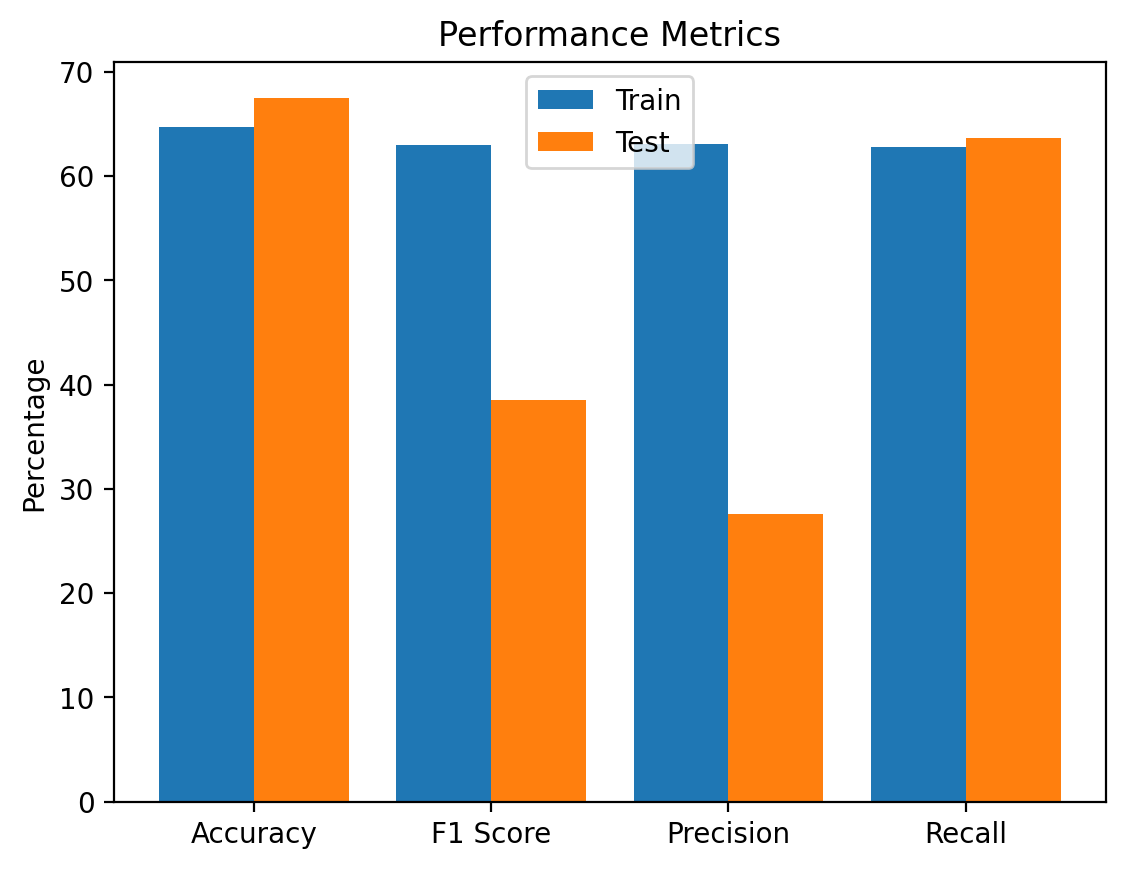

In [24]:
# logistic regression again with the balanced dataset

normalized_df_reg = LogisticRegression().fit(X_train, y_train)

###### Performace Analysis on train data #####

normalized_df_reg_pred = normalized_df_reg.predict(X_train)

# check accuracy: Accuracy: Overall, how often is the classifier correct? Accuracy = (True Pos + True Negative)/total
acc_train = accuracy_score(y_train, normalized_df_reg_pred)
print(f"The accuracy score for LogReg(Train data) is: {round(acc_train,3)*100}%")

# f1 score: The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0.
f1_train = f1_score(y_train, normalized_df_reg_pred)
print(f"The f1 score for LogReg(Train data) is: {round(f1_train,3)*100}%")

# Precision score: When it predicts yes, how often is it correct? Precision=True Positive/predicted yes
precision_train = precision_score(y_train, normalized_df_reg_pred)
print(f"The precision score for LogReg(Train data) is: {round(precision_train,3)*100}%")

# recall score: True Positive Rate(Sensitivity or Recall): When it’s actually yes, how often does it predict yes? True Positive Rate = True Positive/actual yes
recall_train = recall_score(y_train, normalized_df_reg_pred)
print(f"The recall score for LogReg(Train data) is: {round(recall_train,3)*100}%")



###### Performace Analysis on test data #####

normalized_df_reg_pred = normalized_df_reg.predict(X_test)

# check accuracy: Accuracy: Overall, how often is the classifier correct? Accuracy = (True Pos + True Negative)/total
acc_test = accuracy_score(y_test, normalized_df_reg_pred)
print(f"The accuracy score for LogReg(Test data) is: {round(acc_test,3)*100}%")

# f1 score: The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0.
f1_test = f1_score(y_test, normalized_df_reg_pred)
print(f"The f1 score for LogReg(Test data) is: {round(f1_test,3)*100}%")

# Precision score: When it predicts yes, how often is it correct? Precision=True Positive/predicted yes
precision_test = precision_score(y_test, normalized_df_reg_pred)
print(f"The precision score for LogReg(Test data) is: {round(precision_test,3)*100}%")

# recall score: True Positive Rate(Sensitivity or Recall): When it’s actually yes, how often does it predict yes? True Positive Rate = True Positive/actual yes
recall_test = recall_score(y_test, normalized_df_reg_pred)
print(f"The recall score for LogReg(Test data) is: {round(recall_test,3)*100}%")

y = [acc_train, f1_train, precision_train,recall_train]
z = [acc_test, f1_test, precision_test,recall_test]
final_metrics = []
final_metrics.append(z)

plotPairPlot(y,z)


<AxesSubplot:>

Text(0.5, 1.1, 'Confusion matrix Logistic Regression\n')

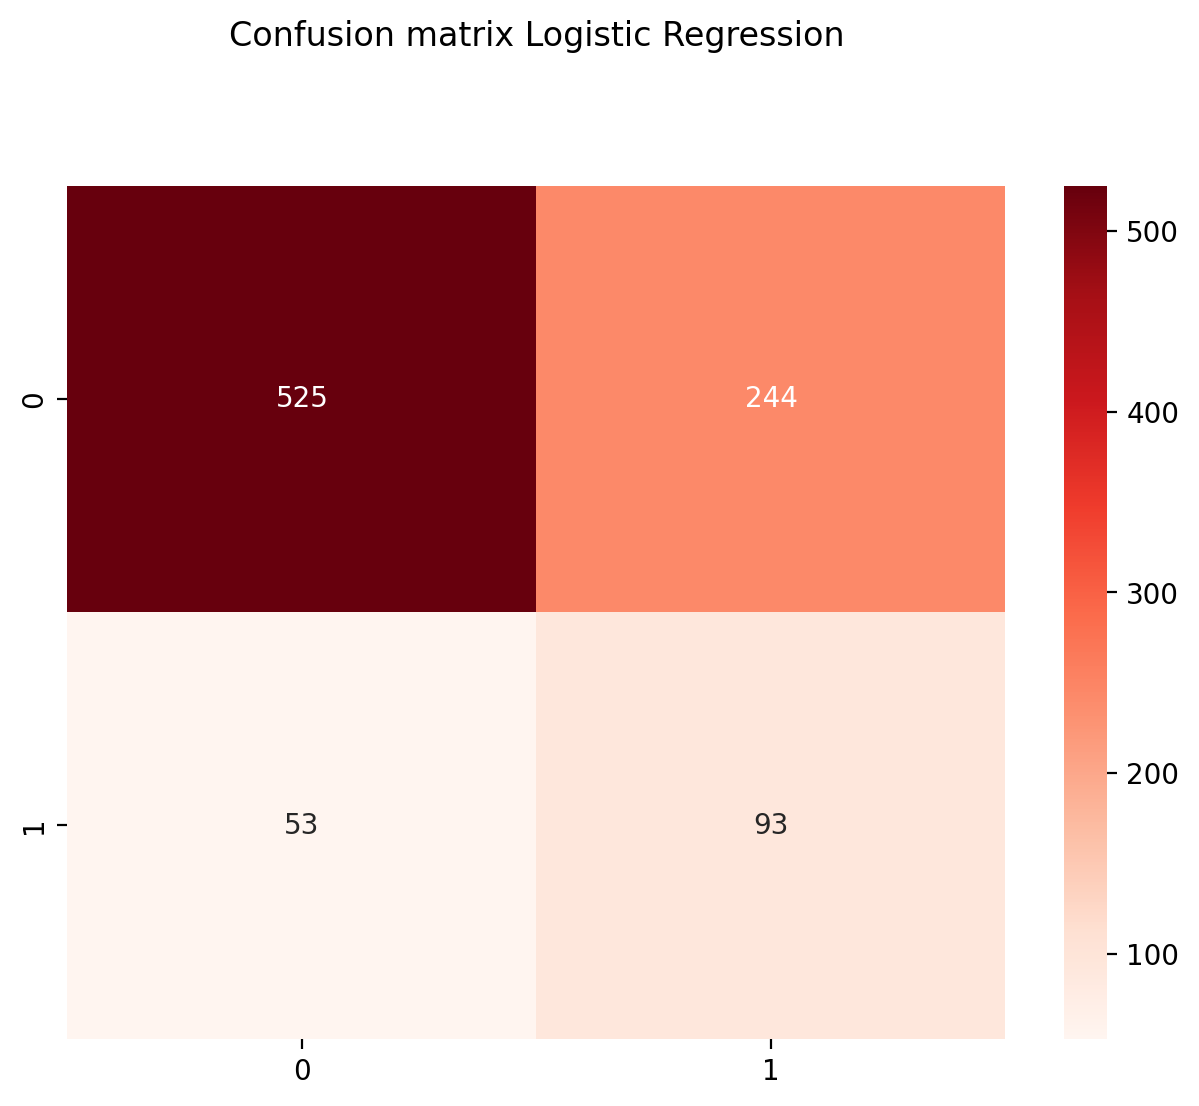

In [25]:
# plotting confusion matrix LogReg
ax= plt.subplot()
cnf_matrix_log = confusion_matrix(y_test, normalized_df_reg_pred)

sns.heatmap(pd.DataFrame(cnf_matrix_log), annot=True,cmap="Reds" , fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix Logistic Regression\n', y=1.1)

# Decision Tree Classification

<Figure size 400x400 with 0 Axes>

<BarContainer object of 7 artists>

Text(0, 0.5, 'Percentage')

Text(0.5, 0, 'Max. depth')

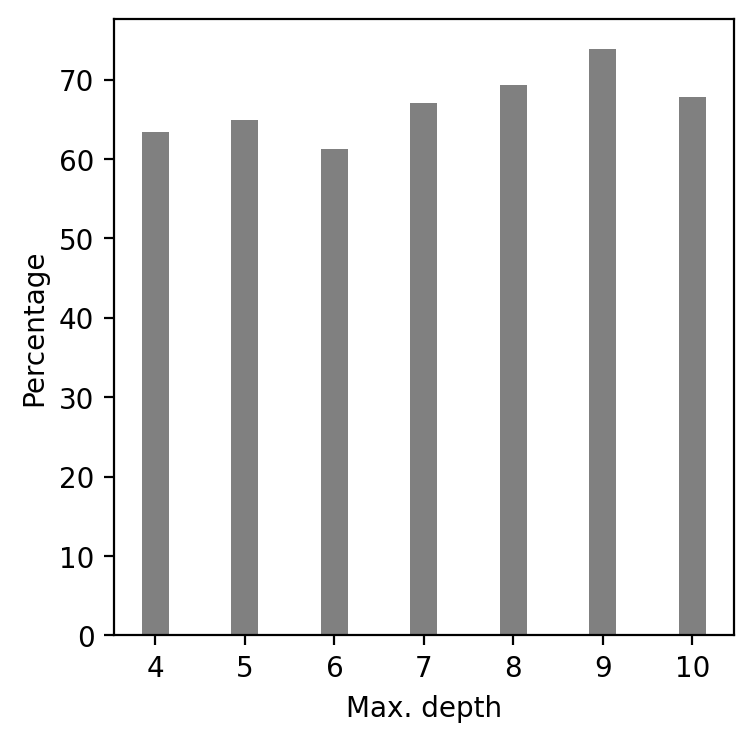

In [26]:
dtc_list = []
for i in range(4,11):
    dtc_up = DecisionTreeClassifier(max_depth = i)
    dtc_up = dtc_up.fit(X_train, y_train)
    normalized_df_dtc_pred = dtc_up.predict(X_test)
    dtc_list.append(accuracy_score(y_test, normalized_df_dtc_pred))
dtc_list = [item * 100 for item in dtc_list]
x = np.arange(4,11)
plt.figure(figsize=(4,4))
plt.bar(x, dtc_list, color ='grey',
        width = 0.3)
plt.ylabel("Percentage")
plt.xlabel("Max. depth")
plt.show()

The accuracy score for DTC(Train data) is: 71.6%
The f1 score for DTC(Train data) is: 70.5%
The precision score for DTC(Train data) is: 69.8%
The recall score for DTC(Train data) is: 71.3%
The accuracy score for DTC(Test data) is: 67.9%
The f1 score for DTC(Test data) is: 47.5%
The precision score for DTC(Test data) is: 32.1%
The recall score for DTC(Test data) is: 91.10000000000001%
The accuracy score for DTC(Train data) is: 86.4%
The f1 score for DTC(Train data) is: 84.7%
The precision score for DTC(Train data) is: 91.10000000000001%
The recall score for DTC(Train data) is: 79.2%
The accuracy score for DTC(Test data) is: 73.4%
The f1 score for DTC(Test data) is: 48.6%
The precision score for DTC(Test data) is: 35.199999999999996%
The recall score for DTC(Test data) is: 78.8%


<AxesSubplot:>

<BarContainer object of 4 artists>

<BarContainer object of 4 artists>

Text(0.5, 1.0, 'Decision Tree with max.depth 5')

([<matplotlib.axis.XTick at 0x7fa8209a20a0>,
 [Text(0, 0, 'Accuracy'),
  Text(1, 0, 'F1 Score'),
  Text(2, 0, 'Precision'),
  Text(3, 0, 'Recall')])

<AxesSubplot:>

<BarContainer object of 4 artists>

<BarContainer object of 4 artists>

Text(0.5, 1.0, 'Decision Tree with max.depth 9')

([<matplotlib.axis.XTick at 0x7fa8430b1460>,
 [Text(0, 0, 'Accuracy'),
  Text(1, 0, 'F1 Score'),
  Text(2, 0, 'Precision'),
  Text(3, 0, 'Recall')])

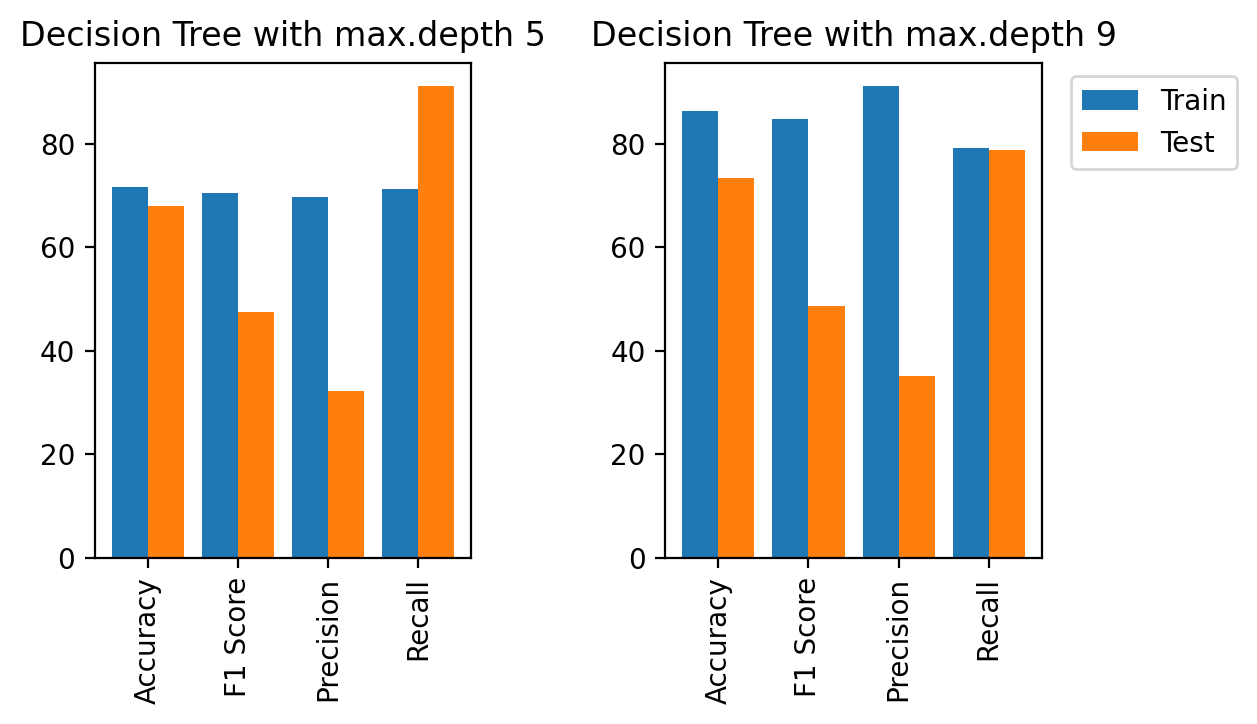

In [27]:
# Decision Tree
### For max_depth = 5 ####

#initialize model
dtc_up_5 = DecisionTreeClassifier(max_depth = 5)

# fit model
dtc_up_5 = dtc_up_5.fit(X_train, y_train)


###### Performace Analysis on train data #####

normalized_df_dtc_pred_5 = dtc_up_5.predict(X_train)

# check accuracy: Accuracy: Overall, how often is the classifier correct? Accuracy = (True Pos + True Negative)/total
acc_train_5 = accuracy_score(y_train, normalized_df_dtc_pred_5)
print(f"The accuracy score for DTC(Train data) is: {round(acc_train_5,3)*100}%")

# f1 score: The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0.
f1_train_5 = f1_score(y_train, normalized_df_dtc_pred_5)
print(f"The f1 score for DTC(Train data) is: {round(f1_train_5,3)*100}%")

# Precision score: When it predicts yes, how often is it correct? Precision=True Positive/predicted yes
precision_train_5 = precision_score(y_train, normalized_df_dtc_pred_5)
print(f"The precision score for DTC(Train data) is: {round(precision_train_5,3)*100}%")

# recall score: True Positive Rate(Sensitivity or Recall): When it’s actually yes, how often does it predict yes? True Positive Rate = True Positive/actual yes
recall_train_5 = recall_score(y_train, normalized_df_dtc_pred_5)
print(f"The recall score for DTC(Train data) is: {round(recall_train_5,3)*100}%")



###### Performace Analysis on test data #####

normalized_df_dtc_pred_5 = dtc_up.predict(X_test)

# check accuracy: Accuracy: Overall, how often is the classifier correct? Accuracy = (True Pos + True Negative)/total
acc_test_5 = accuracy_score(y_test, normalized_df_dtc_pred_5)
print(f"The accuracy score for DTC(Test data) is: {round(acc_test_5,3)*100}%")

# f1 score: The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0.
f1_test_5 = f1_score(y_test, normalized_df_dtc_pred_5)
print(f"The f1 score for DTC(Test data) is: {round(f1_test_5,3)*100}%")

# Precision score: When it predicts yes, how often is it correct? Precision=True Positive/predicted yes
precision_test_5 = precision_score(y_test, normalized_df_dtc_pred_5)
print(f"The precision score for DTC(Test data) is: {round(precision_test_5,3)*100}%")

# recall score: True Positive Rate(Sensitivity or Recall): When it’s actually yes, how often does it predict yes? True Positive Rate = True Positive/actual yes
recall_test_5 = recall_score(y_test, normalized_df_dtc_pred_5)
print(f"The recall score for DTC(Test data) is: {round(recall_test_5,3)*100}%")


y_5 = [acc_train_5, f1_train_5, precision_train_5,recall_train_5]
z_5 = [acc_test_5, f1_test_5, precision_test_5,recall_test_5]
final_metrics.append(z_5)

#plotPairPlot(y,z)




##### For max depth = 9 ###
#initialize model
dtc_up_9 = DecisionTreeClassifier(max_depth = 9)

# fit model
dtc_up_9 = dtc_up_9.fit(X_train, y_train)


###### Performace Analysis on train data #####

normalized_df_dtc_pred = dtc_up_9.predict(X_train)

# check accuracy: Accuracy: Overall, how often is the classifier correct? Accuracy = (True Pos + True Negative)/total
acc_train_9 = accuracy_score(y_train, normalized_df_dtc_pred)
print(f"The accuracy score for DTC(Train data) is: {round(acc_train_9,3)*100}%")

# f1 score: The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0.
f1_train_9 = f1_score(y_train, normalized_df_dtc_pred)
print(f"The f1 score for DTC(Train data) is: {round(f1_train_9,3)*100}%")

# Precision score: When it predicts yes, how often is it correct? Precision=True Positive/predicted yes
precision_train_9 = precision_score(y_train, normalized_df_dtc_pred)
print(f"The precision score for DTC(Train data) is: {round(precision_train_9,3)*100}%")

# recall score: True Positive Rate(Sensitivity or Recall): When it’s actually yes, how often does it predict yes? True Positive Rate = True Positive/actual yes
recall_train_9 = recall_score(y_train, normalized_df_dtc_pred)
print(f"The recall score for DTC(Train data) is: {round(recall_train_9,3)*100}%")



###### Performace Analysis on test data #####

normalized_df_dtc_pred = dtc_up_9.predict(X_test)

# check accuracy: Accuracy: Overall, how often is the classifier correct? Accuracy = (True Pos + True Negative)/total
acc_test_9 = accuracy_score(y_test, normalized_df_dtc_pred)
print(f"The accuracy score for DTC(Test data) is: {round(acc_test_9,3)*100}%")

# f1 score: The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0.
f1_test_9 = f1_score(y_test, normalized_df_dtc_pred)
print(f"The f1 score for DTC(Test data) is: {round(f1_test_9,3)*100}%")

# Precision score: When it predicts yes, how often is it correct? Precision=True Positive/predicted yes
precision_test_9 = precision_score(y_test, normalized_df_dtc_pred)
print(f"The precision score for DTC(Test data) is: {round(precision_test_9,3)*100}%")

# recall score: True Positive Rate(Sensitivity or Recall): When it’s actually yes, how often does it predict yes? True Positive Rate = True Positive/actual yes
recall_test_9 = recall_score(y_test, normalized_df_dtc_pred)
print(f"The recall score for DTC(Test data) is: {round(recall_test_9,3)*100}%")

y_9 = [acc_train_9, f1_train_9, precision_train_9,recall_train_9]
z_9 = [acc_test_9, f1_test_9, precision_test_9,recall_test_9]



plt.subplot(1,2,1)
X = ['Accuracy','F1 Score','Precision','Recall']
y1 = [ item * 100 for item in y_5]
z1 = [ item * 100 for item in z_5]
X_axis = np.arange(len(X))
plt.bar(X_axis - 0.2, y1, 0.4, label = 'Train')
plt.bar(X_axis + 0.2, z1, 0.4, label = 'Test')
plt.title("Decision Tree with max.depth 5")
plt.xticks(X_axis, X,rotation='vertical')


plt.subplot(1,2,2)
y2 = [ item * 100 for item in y_9]
z2 = [ item * 100 for item in z_9]
X_axis = np.arange(len(X))
plt.bar(X_axis - 0.2, y2, 0.4, label = 'Train')
plt.bar(X_axis + 0.2, z2, 0.4, label = 'Test')
plt.title("Decision Tree with max.depth 9")
plt.xticks(X_axis, X,rotation='vertical')
plt.tight_layout(pad=5.0)
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.show()


Although, Decision tree with max depth 9 has higher accuracy on train data, it's accuracy on test data is very low comparatively which may be an indication of overfitting.
Decision tree with max depth 5 has train data and test data accuracies very closer.
Hence, a decision tree with max depth = 5 would be a good model for our predicition.

In [28]:
from sklearn.tree import export_text
parameters = ['male','age','currentSmoker','cigsPerDay','BPMeds','prevalentStroke','prevalentHyp','diabetes','totChol','sysBP','diaBP','BMI','heartRate','glucose']
print(export_text(dtc_up_5,feature_names=parameters))


|--- age <= 48.50
|   |--- sysBP <= 131.75
|   |   |--- cigsPerDay <= 9.50
|   |   |   |--- glucose <= 103.50
|   |   |   |   |--- totChol <= 407.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- totChol >  407.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- glucose >  103.50
|   |   |   |   |--- heartRate <= 64.00
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- heartRate >  64.00
|   |   |   |   |   |--- class: 1
|   |   |--- cigsPerDay >  9.50
|   |   |   |--- glucose <= 65.50
|   |   |   |   |--- diaBP <= 88.00
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- diaBP >  88.00
|   |   |   |   |   |--- class: 0
|   |   |   |--- glucose >  65.50
|   |   |   |   |--- totChol <= 240.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- totChol >  240.50
|   |   |   |   |   |--- class: 0
|   |--- sysBP >  131.75
|   |   |--- sysBP <= 187.25
|   |   |   |--- cigsPerDay <= 16.00
|   |   |   |   |--- heartRate <= 79.00
|   |   |   |   |   |--- class: 0
|   |   | 

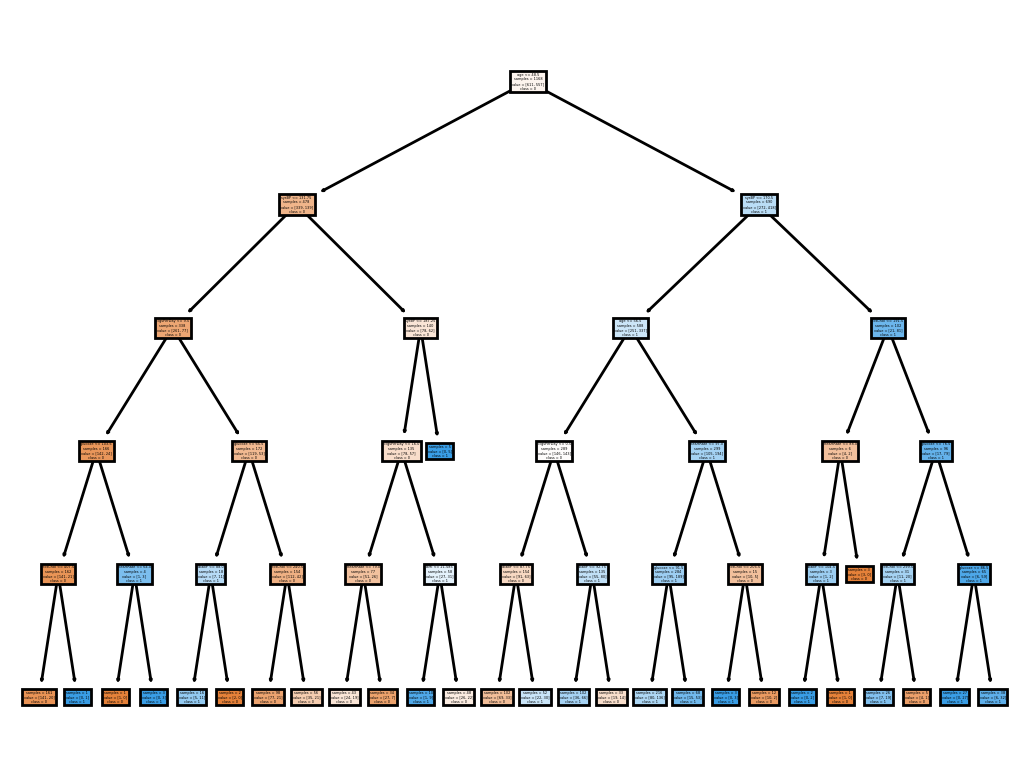

<Figure size 1400x1000 with 0 Axes>

In [29]:
from sklearn import tree
fig = tree.plot_tree(dtc_up_5,feature_names=df.columns[:len(df.columns)-1],class_names = ['0','1'],filled=True,impurity=False)
f = plt.figure()
f.set_figwidth(14)
f.set_figheight(10)
plt.show(fig)

<AxesSubplot:>

Text(0.5, 1.1, 'Confusion matrix Decision Tree\n')

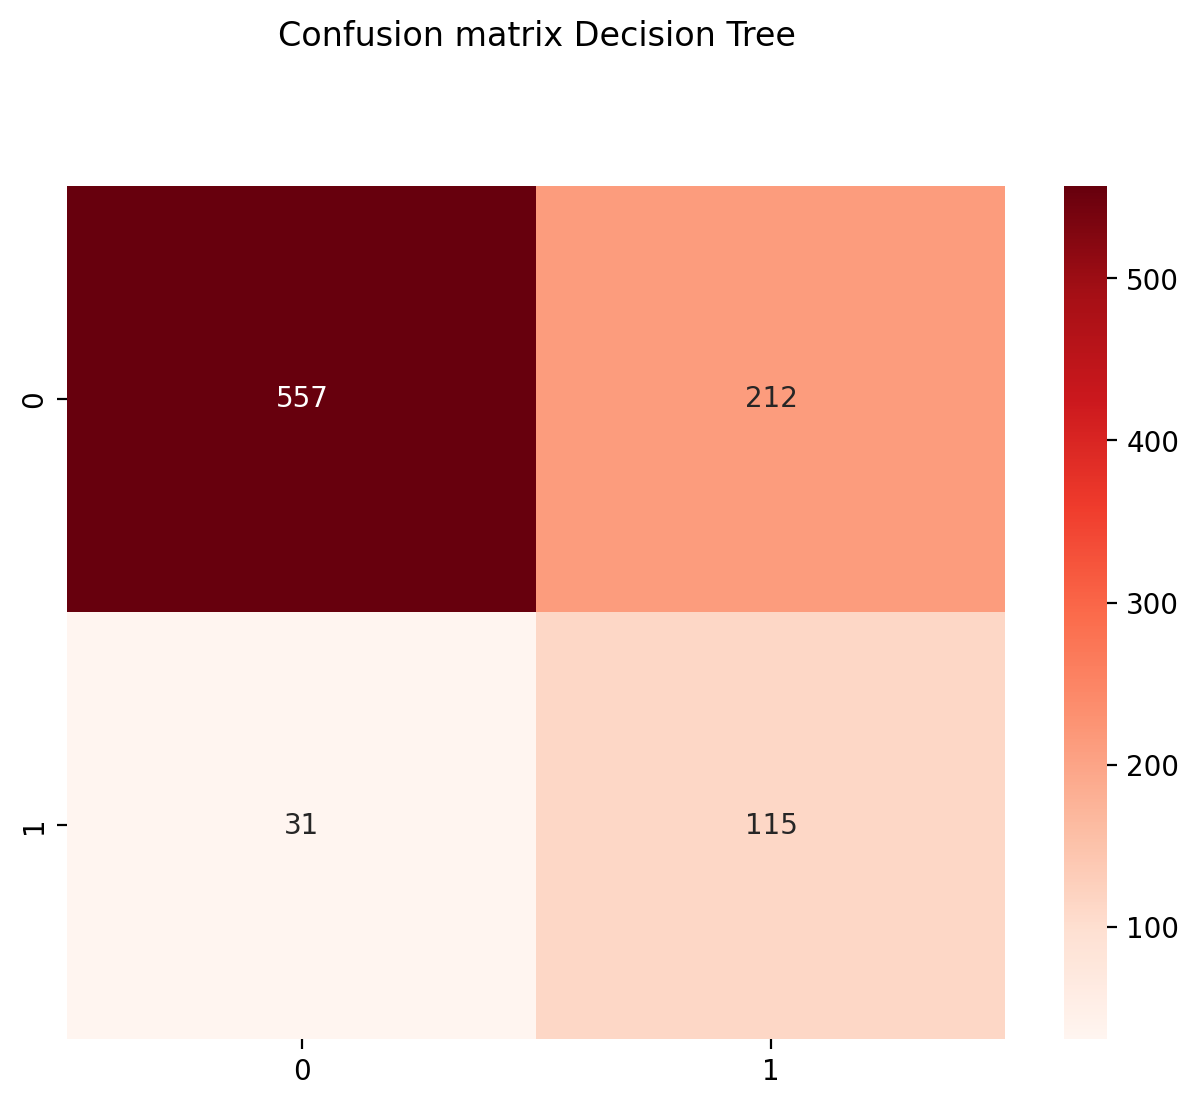

In [30]:
# plotting confusion matrix Decision Tree
ax= plt.subplot()
cnf_matrix_log = confusion_matrix(y_test, normalized_df_dtc_pred)

sns.heatmap(pd.DataFrame(cnf_matrix_log), annot=True,cmap="Reds" , fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix Decision Tree\n', y=1.1)

# KNN Classification

KNeighborsClassifier(n_neighbors=2)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


KNeighborsClassifier(n_neighbors=3)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


KNeighborsClassifier(n_neighbors=4)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


KNeighborsClassifier()

/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


KNeighborsClassifier(n_neighbors=6)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


KNeighborsClassifier(n_neighbors=7)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


<Figure size 400x400 with 0 Axes>

<BarContainer object of 6 artists>

Text(0, 0.5, 'Percentage')

Text(0.5, 0, 'Nearest Neighbours')

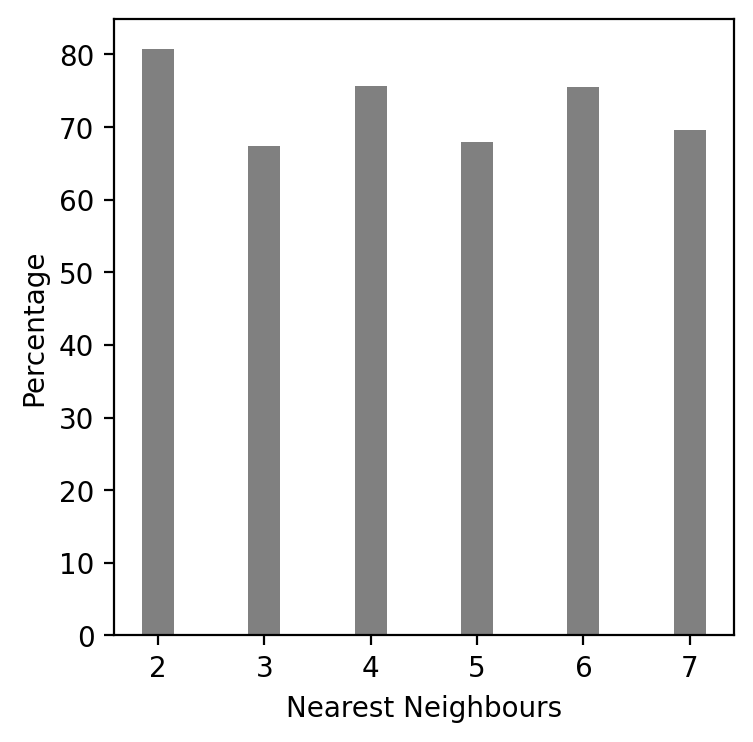

In [31]:
knn_list = []
for i in range(2,8):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    normalized_df_knn_pred = knn.predict(X_test)
    knn_list.append(accuracy_score(y_test, normalized_df_knn_pred))
knn_list = [item * 100 for item in knn_list]
x = np.arange(2,8)
plt.figure(figsize=(4,4))
plt.bar(x, knn_list, color ='grey',
        width = 0.3)
plt.ylabel("Percentage")
plt.xlabel("Nearest Neighbours")
plt.show()

It can be cleary inferred that for k = 2, the model has higher accuracy when compared with other k nearest neighbors
Hence, considering k = 2 for building the model.

KNeighborsClassifier(n_neighbors=2)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

The accuracy score for KNN(Train data) is: 77.7%
The f1 score for KNN(Train data) is: 69.39999999999999%
The precision score for KNN(Train data) is: 100.0%
The recall score for KNN(Train data) is: 53.1%
The accuracy score for KNN(Test data) is: 80.80000000000001%
The f1 score for KNN(Test data) is: 47.9%
The precision score for KNN(Test data) is: 42.199999999999996%
The recall score for KNN(Test data) is: 55.50000000000001%


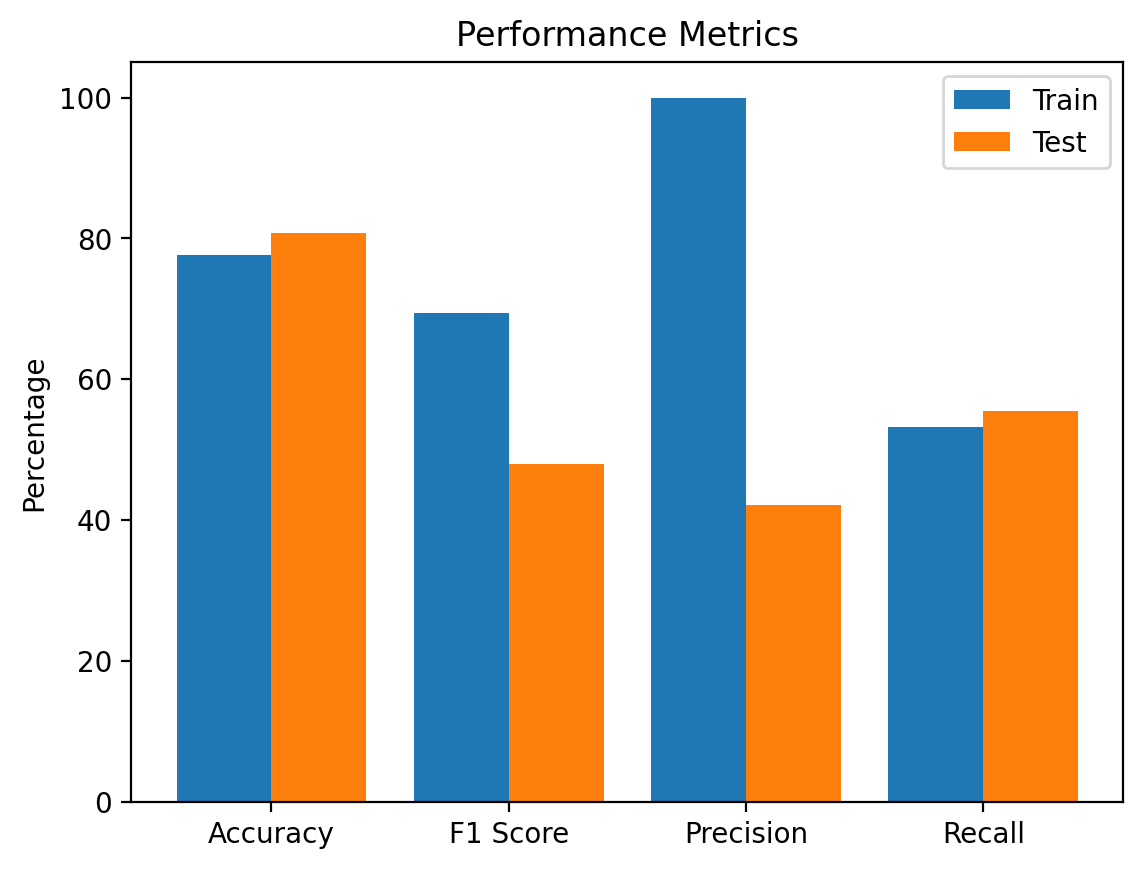

In [32]:
# KNN Model

#initialize model
knn = KNeighborsClassifier(n_neighbors = 2)

#fit model
knn.fit(X_train, y_train)

#### Performance Analysis on Train data ####

normalized_df_knn_pred = knn.predict(X_train)


# check accuracy: Accuracy: Overall, how often is the classifier correct? Accuracy = (True Pos + True Negative)/total
acc_train = accuracy_score(y_train, normalized_df_knn_pred)
print(f"The accuracy score for KNN(Train data) is: {round(acc_train,3)*100}%")

# f1 score: The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0.
f1_train = f1_score(y_train, normalized_df_knn_pred)
print(f"The f1 score for KNN(Train data) is: {round(f1_train,3)*100}%")

# Precision score: When it predicts yes, how often is it correct? Precision=True Positive/predicted yes
precision_train = precision_score(y_train, normalized_df_knn_pred)
print(f"The precision score for KNN(Train data) is: {round(precision_train,3)*100}%")

# recall score: True Positive Rate(Sensitivity or Recall): When it’s actually yes, how often does it predict yes? True Positive Rate = True Positive/actual yes
recall_train = recall_score(y_train, normalized_df_knn_pred)
print(f"The recall score for KNN(Train data) is: {round(recall_train,3)*100}%")


#### Performance Analysis on Test data ####
normalized_df_knn_pred = knn.predict(X_test)


# check accuracy: Accuracy: Overall, how often is the classifier correct? Accuracy = (True Pos + True Negative)/total
acc_test = accuracy_score(y_test, normalized_df_knn_pred)
print(f"The accuracy score for KNN(Test data) is: {round(acc_test,3)*100}%")

# f1 score: The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0.
f1_test = f1_score(y_test, normalized_df_knn_pred)
print(f"The f1 score for KNN(Test data) is: {round(f1_test,3)*100}%")

# Precision score: When it predicts yes, how often is it correct? Precision=True Positive/predicted yes
precision_test = precision_score(y_test, normalized_df_knn_pred)
print(f"The precision score for KNN(Test data) is: {round(precision_test,3)*100}%")

# recall score: True Positive Rate(Sensitivity or Recall): When it’s actually yes, how often does it predict yes? True Positive Rate = True Positive/actual yes
recall_test = recall_score(y_test, normalized_df_knn_pred)
print(f"The recall score for KNN(Test data) is: {round(recall_test,3)*100}%")


y = [acc_train, f1_train, precision_train,recall_train]
z = [acc_test, f1_test, precision_test,recall_test]
final_metrics.append(z)

plotPairPlot(y,z)


<AxesSubplot:>

Text(0.5, 1.1, 'Confusion matrix KNN Classification\n')

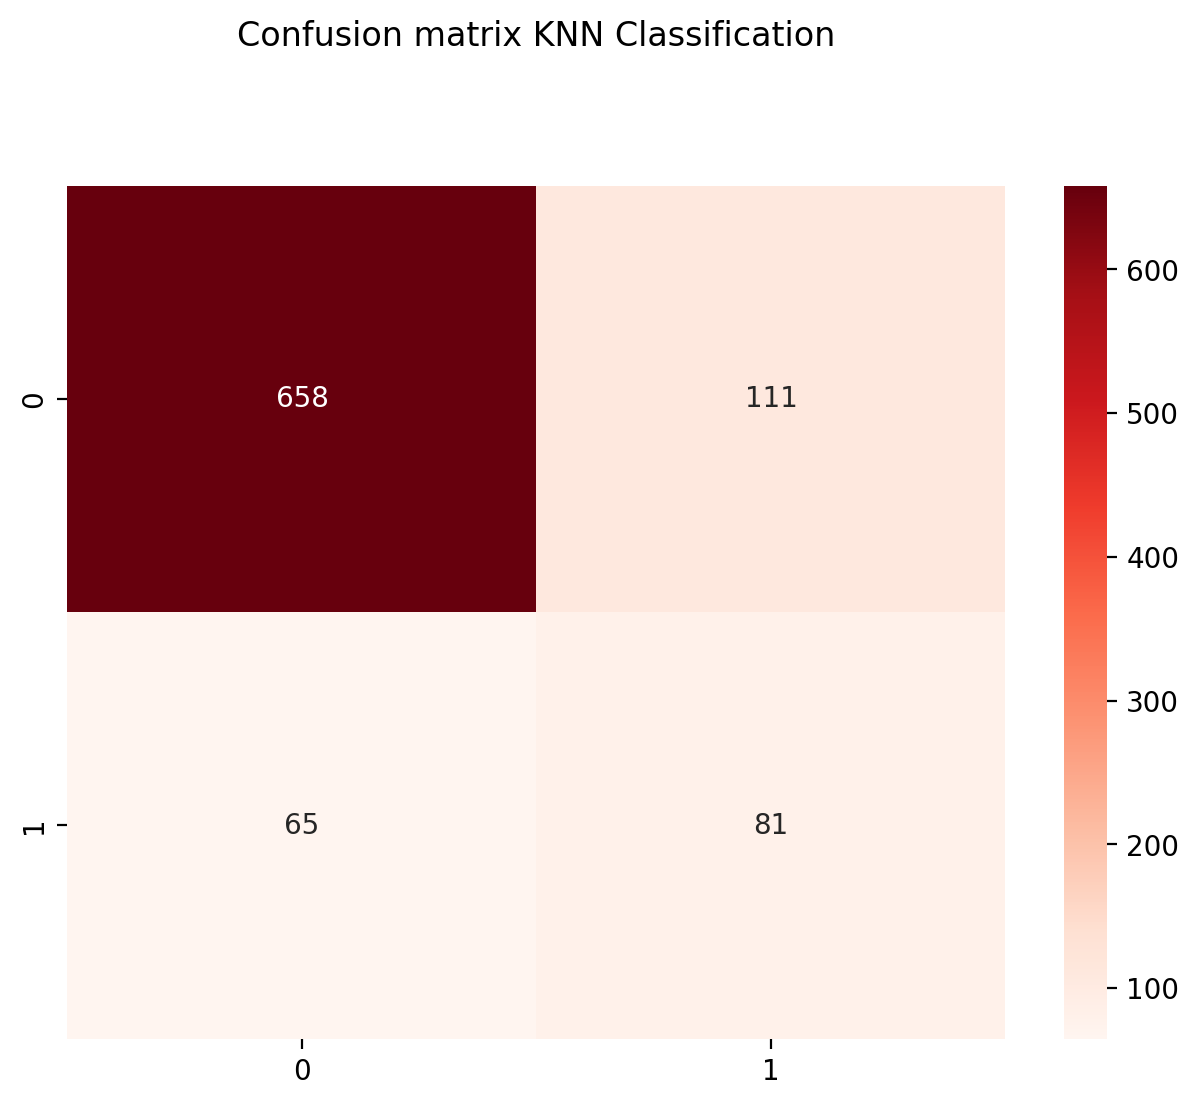

In [33]:
# plotting confusion matrix KNN prediction
ax= plt.subplot()
cnf_matrix_log = confusion_matrix(y_test, normalized_df_knn_pred)

sns.heatmap(pd.DataFrame(cnf_matrix_log), annot=True,cmap="Reds" , fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix KNN Classification\n', y=1.1)

# SVM Classification

SVC()

The accuracy score for SVM(Train data) is: 65.4%
The f1 score for SVM(Train data) is: 59.599999999999994%
The precision score for SVM(Train data) is: 67.30000000000001%
The recall score for SVM(Train data) is: 53.5%
The accuracy score for SVM(Test data) is: 74.2%
The f1 score for SVM(Test data) is: 41.3%
The precision score for SVM(Test data) is: 32.4%
The recall score for SVM(Test data) is: 56.8%


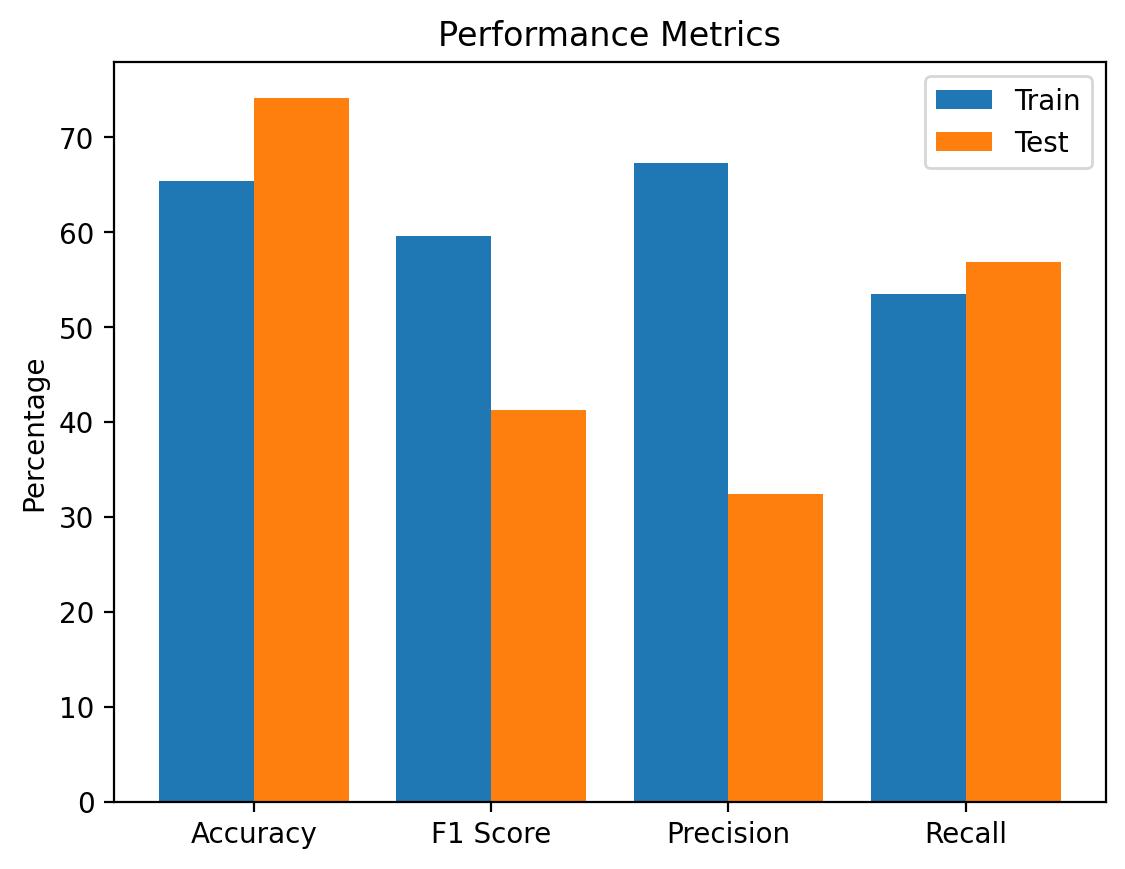

In [34]:
# Support Vector Machine

#initialize model
svm = SVC()

#fit model
svm.fit(X_train, y_train)


#### Performance Analaysis on train data ####

normalized_df_svm_pred = svm.predict(X_train)

# check accuracy: Accuracy: Overall, how often is the classifier correct? Accuracy = (True Pos + True Negative)/total
acc_train = accuracy_score(y_train, normalized_df_svm_pred)
print(f"The accuracy score for SVM(Train data) is: {round(acc_train,3)*100}%")

# f1 score: The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0.
f1_train = f1_score(y_train, normalized_df_svm_pred)
print(f"The f1 score for SVM(Train data) is: {round(f1_train,3)*100}%")

# Precision score: When it predicts yes, how often is it correct? Precision=True Positive/predicted yes
precision_train = precision_score(y_train, normalized_df_svm_pred)
print(f"The precision score for SVM(Train data) is: {round(precision_train,3)*100}%")

# recall score: True Positive Rate(Sensitivity or Recall): When it’s actually yes, how often does it predict yes? True Positive Rate = True Positive/actual yes
recall_train = recall_score(y_train, normalized_df_svm_pred)
print(f"The recall score for SVM(Train data) is: {round(recall_train,3)*100}%")



##### Performance Analysis on test data ######

normalized_df_svm_pred = svm.predict(X_test)

# check accuracy: Accuracy: Overall, how often is the classifier correct? Accuracy = (True Pos + True Negative)/total
acc_test = accuracy_score(y_test, normalized_df_svm_pred)
print(f"The accuracy score for SVM(Test data) is: {round(acc_test,3)*100}%")

# f1 score: The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0.
f1_test = f1_score(y_test, normalized_df_svm_pred)
print(f"The f1 score for SVM(Test data) is: {round(f1_test,3)*100}%")

# Precision score: When it predicts yes, how often is it correct? Precision=True Positive/predicted yes
precision_test = precision_score(y_test, normalized_df_svm_pred)
print(f"The precision score for SVM(Test data) is: {round(precision_test,3)*100}%")

# recall score: True Positive Rate(Sensitivity or Recall): When it’s actually yes, how often does it predict yes? True Positive Rate = True Positive/actual yes
recall_test = recall_score(y_test, normalized_df_svm_pred)
print(f"The recall score for SVM(Test data) is: {round(recall_test,3)*100}%")

y = [acc_train, f1_train, precision_train,recall_train]
z = [acc_test, f1_test, precision_test,recall_test]

final_metrics.append(z)
plotPairPlot(y,z)


<AxesSubplot:>

Text(0.5, 1.1, 'Confusion matrix SVM\n')

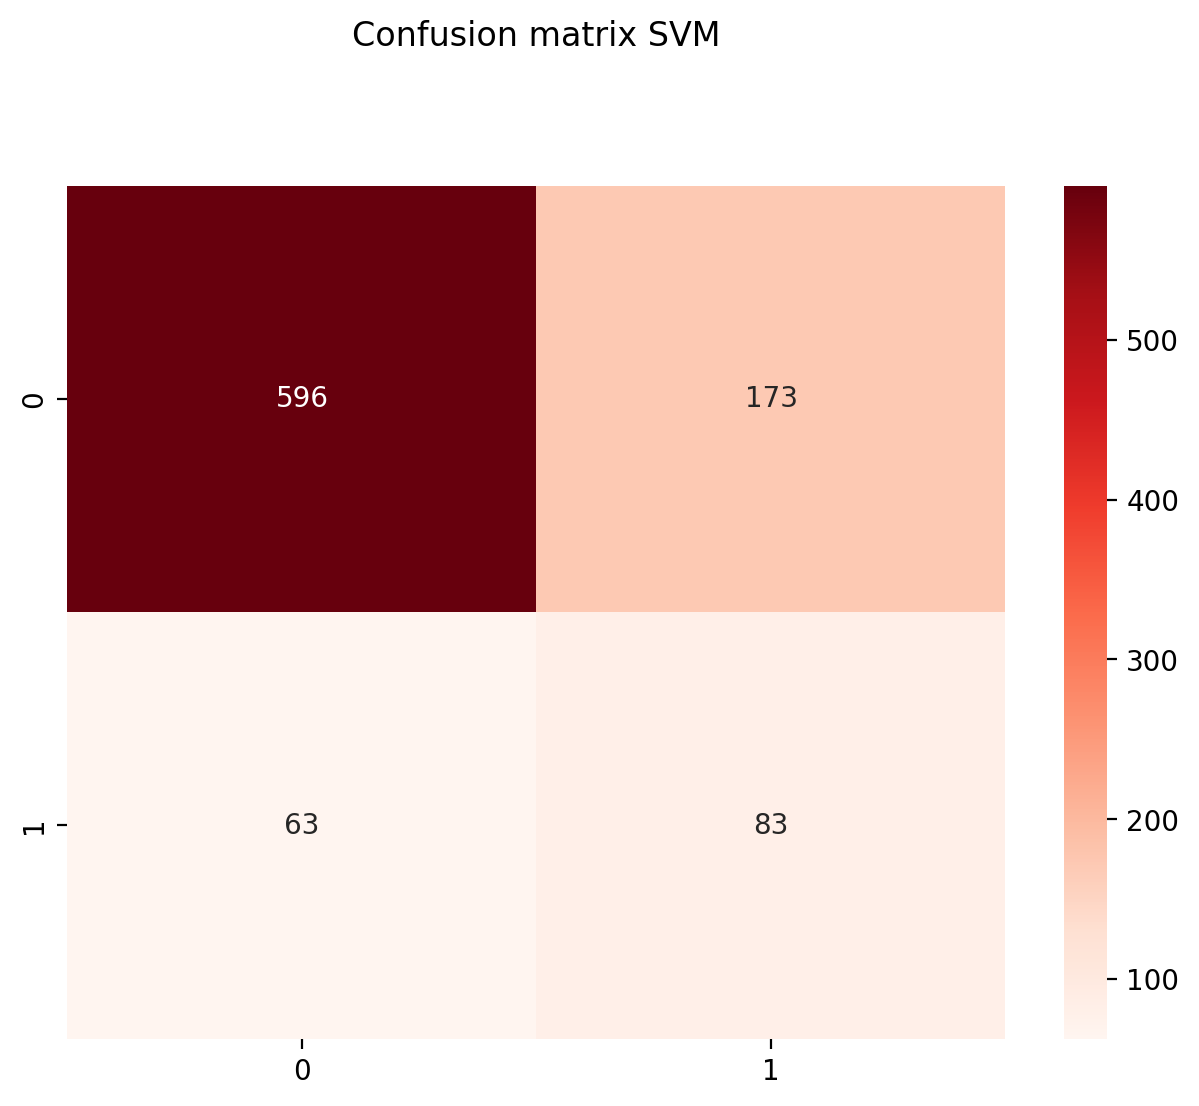

In [35]:
# plotting confusion matrix SVM

cnf_matrix_svm = confusion_matrix(y_test, normalized_df_svm_pred)

sns.heatmap(pd.DataFrame(cnf_matrix_svm), annot=True,cmap="Reds" , fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix SVM\n', y=1.1)

# Naive Bayes Classification

The accuracy score for NB(Train data) is: 61.9%
The f1 score for NB(Train data) is: 45.9%
The precision score for NB(Train data) is: 71.1%
The recall score for NB(Train data) is: 33.900000000000006%
The accuracy score for NB(Test data) is: 80.80000000000001%
The f1 score for NB(Test data) is: 35.3%
The precision score for NB(Test data) is: 38.1%
The recall score for NB(Test data) is: 32.9%


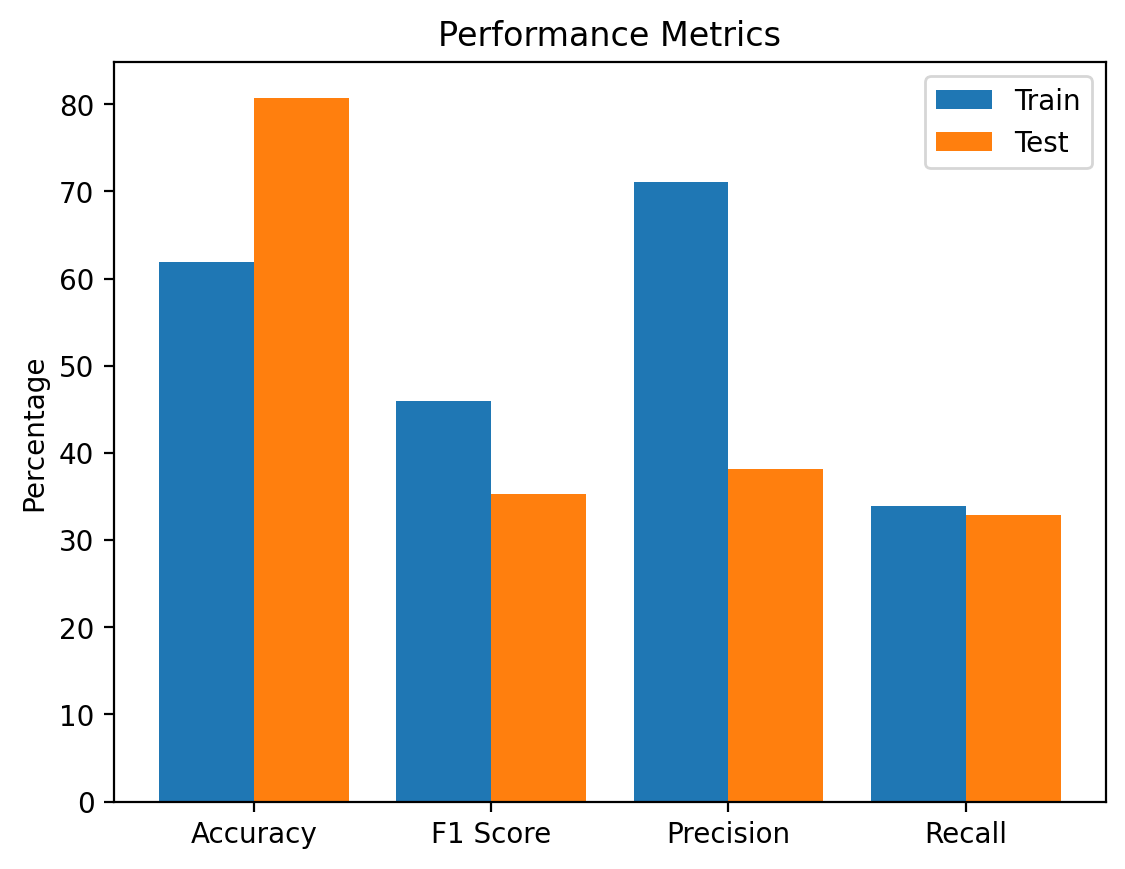

In [36]:
from sklearn.naive_bayes import GaussianNB
 
#Calling the Class
naive_bayes = GaussianNB()
 
#Fitting the data to the classifier
normalized_df_nb = naive_bayes.fit(X_train , y_train)

### Performance Analysis on train data ######
normalized_df_nb_pred = normalized_df_nb.predict(X_train)


# check accuracy: Accuracy: Overall, how often is the classifier correct? Accuracy = (True Pos + True Negative)/total
acc_train = accuracy_score(y_train, normalized_df_nb_pred)
print(f"The accuracy score for NB(Train data) is: {round(acc_train,3)*100}%")

# f1 score: The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0.
f1_train = f1_score(y_train, normalized_df_nb_pred)
print(f"The f1 score for NB(Train data) is: {round(f1_train,3)*100}%")

# Precision score: When it predicts yes, how often is it correct? Precision=True Positive/predicted yes
precision_train = precision_score(y_train, normalized_df_nb_pred)
print(f"The precision score for NB(Train data) is: {round(precision_train,3)*100}%")

# recall score: True Positive Rate(Sensitivity or Recall): When it’s actually yes, how often does it predict yes? True Positive Rate = True Positive/actual yes
recall_train = recall_score(y_train, normalized_df_nb_pred)
print(f"The recall score for NB(Train data) is: {round(recall_train,3)*100}%")



##### Performance Analysis on test data #####

normalized_df_nb_pred = normalized_df_nb.predict(X_test)


# check accuracy: Accuracy: Overall, how often is the classifier correct? Accuracy = (True Pos + True Negative)/total
acc_test = accuracy_score(y_test, normalized_df_nb_pred)
print(f"The accuracy score for NB(Test data) is: {round(acc_test,3)*100}%")

# f1 score: The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0.
f1_test = f1_score(y_test, normalized_df_nb_pred)
print(f"The f1 score for NB(Test data) is: {round(f1_test,3)*100}%")

# Precision score: When it predicts yes, how often is it correct? Precision=True Positive/predicted yes
precision_test = precision_score(y_test, normalized_df_nb_pred)
print(f"The precision score for NB(Test data) is: {round(precision_test,3)*100}%")

# recall score: True Positive Rate(Sensitivity or Recall): When it’s actually yes, how often does it predict yes? True Positive Rate = True Positive/actual yes
recall_test = recall_score(y_test, normalized_df_nb_pred)
print(f"The recall score for NB(Test data) is: {round(recall_test,3)*100}%")


y = [acc_train, f1_train, precision_train,recall_train]
z = [acc_test, f1_test, precision_test,recall_test]

final_metrics.append(z)
plotPairPlot(y,z)

<AxesSubplot:>

Text(0.5, 1.1, 'Confusion matrix Naive Bayes\n')

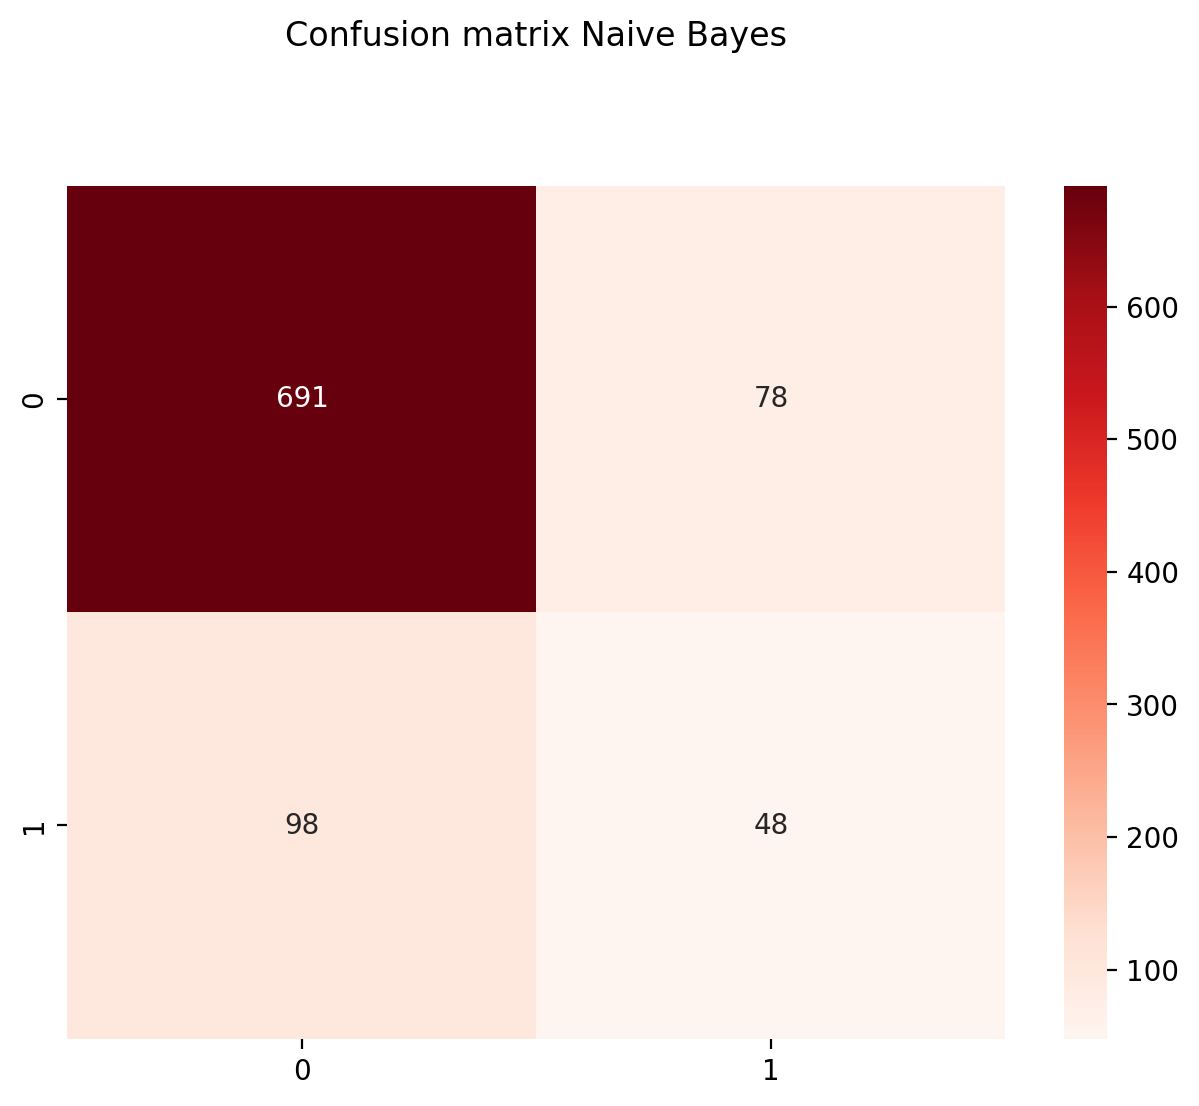

In [37]:
# plotting confusion matrix Naive Bayes Classifier

cnf_matrix_nb = confusion_matrix(y_test, normalized_df_nb_pred)

sns.heatmap(pd.DataFrame(cnf_matrix_nb), annot=True, cmap="Reds" , fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix Naive Bayes\n', y=1.1)

# ENSEMBLING

# Random Forest Classification

The accuracy score for RF(Train data) is: 73.5%
The f1 score for RF(Train data) is: 72.7%
The precision score for RF(Train data) is: 71.6%
The recall score for RF(Train data) is: 73.8%
The accuracy score for RF(Test data) is: 68.30000000000001%
The f1 score for RF(Test data) is: 42.199999999999996%
The precision score for RF(Test data) is: 29.799999999999997%
The recall score for RF(Test data) is: 72.6%


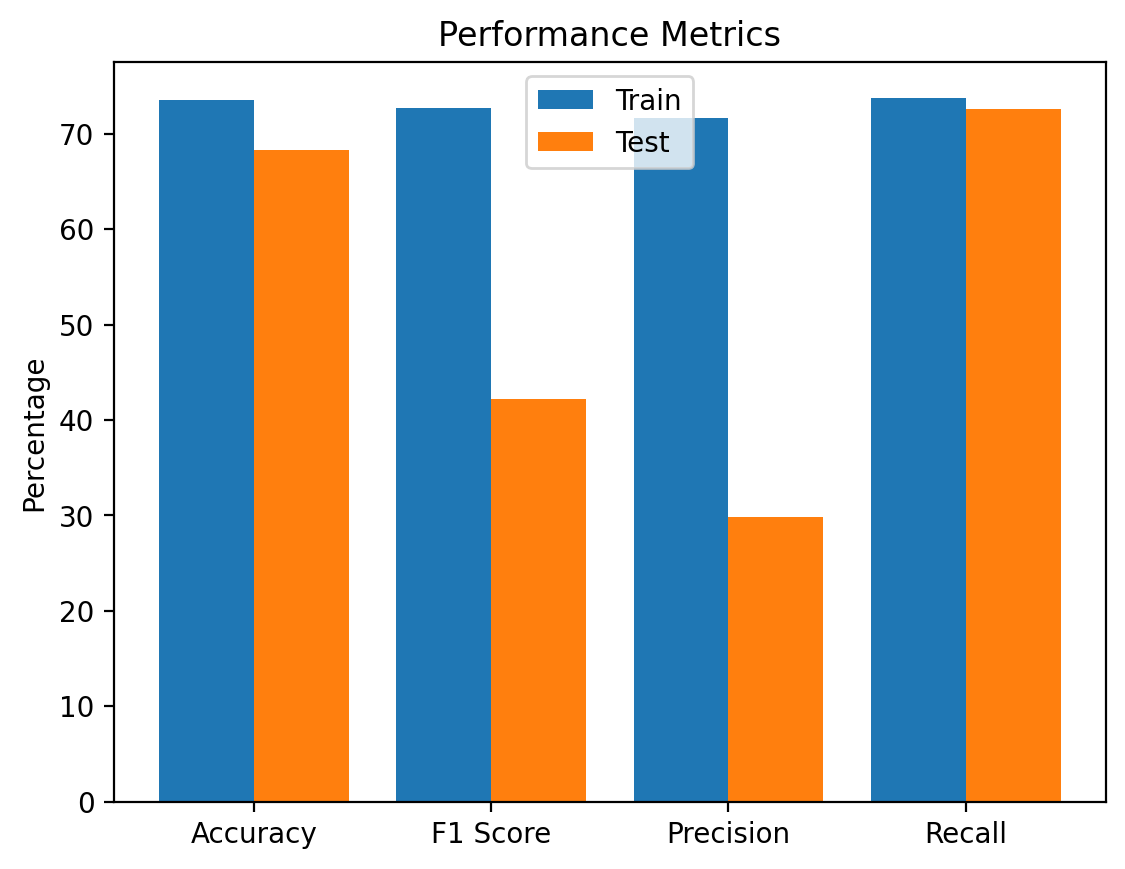

In [38]:
from sklearn.ensemble import RandomForestClassifier
##Random Forest Classifier
rfc=RandomForestClassifier(max_depth=5)
#Fitting the data to the classifier
normalized_df_rfc = rfc.fit(X_train , y_train)

### Performance Analysis on train data ######
normalized_df_rfc_pred = normalized_df_rfc.predict(X_train)


# check accuracy: Accuracy: Overall, how often is the classifier correct? Accuracy = (True Pos + True Negative)/total
acc_train = accuracy_score(y_train, normalized_df_rfc_pred)
print(f"The accuracy score for RF(Train data) is: {round(acc_train,3)*100}%")

# f1 score: The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0.
f1_train = f1_score(y_train, normalized_df_rfc_pred)
print(f"The f1 score for RF(Train data) is: {round(f1_train,3)*100}%")

# Precision score: When it predicts yes, how often is it correct? Precision=True Positive/predicted yes
precision_train = precision_score(y_train, normalized_df_rfc_pred)
print(f"The precision score for RF(Train data) is: {round(precision_train,3)*100}%")

# recall score: True Positive Rate(Sensitivity or Recall): When it’s actually yes, how often does it predict yes? True Positive Rate = True Positive/actual yes
recall_train = recall_score(y_train, normalized_df_rfc_pred)
print(f"The recall score for RF(Train data) is: {round(recall_train,3)*100}%")



##### Performance Analysis on test data #####

normalized_df_rfc_pred = normalized_df_rfc.predict(X_test)


# check accuracy: Accuracy: Overall, how often is the classifier correct? Accuracy = (True Pos + True Negative)/total
acc_test = accuracy_score(y_test, normalized_df_rfc_pred)
print(f"The accuracy score for RF(Test data) is: {round(acc_test,3)*100}%")

# f1 score: The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0.
f1_test = f1_score(y_test, normalized_df_rfc_pred)
print(f"The f1 score for RF(Test data) is: {round(f1_test,3)*100}%")

# Precision score: When it predicts yes, how often is it correct? Precision=True Positive/predicted yes
precision_test = precision_score(y_test, normalized_df_rfc_pred)
print(f"The precision score for RF(Test data) is: {round(precision_test,3)*100}%")

# recall score: True Positive Rate(Sensitivity or Recall): When it’s actually yes, how often does it predict yes? True Positive Rate = True Positive/actual yes
recall_test = recall_score(y_test, normalized_df_rfc_pred)
print(f"The recall score for RF(Test data) is: {round(recall_test,3)*100}%")


y = [acc_train, f1_train, precision_train,recall_train]
z = [acc_test, f1_test, precision_test,recall_test]

final_metrics.append(z)
plotPairPlot(y,z)


<AxesSubplot:>

Text(0.5, 1.1, 'Confusion matrix Random Forest\n')

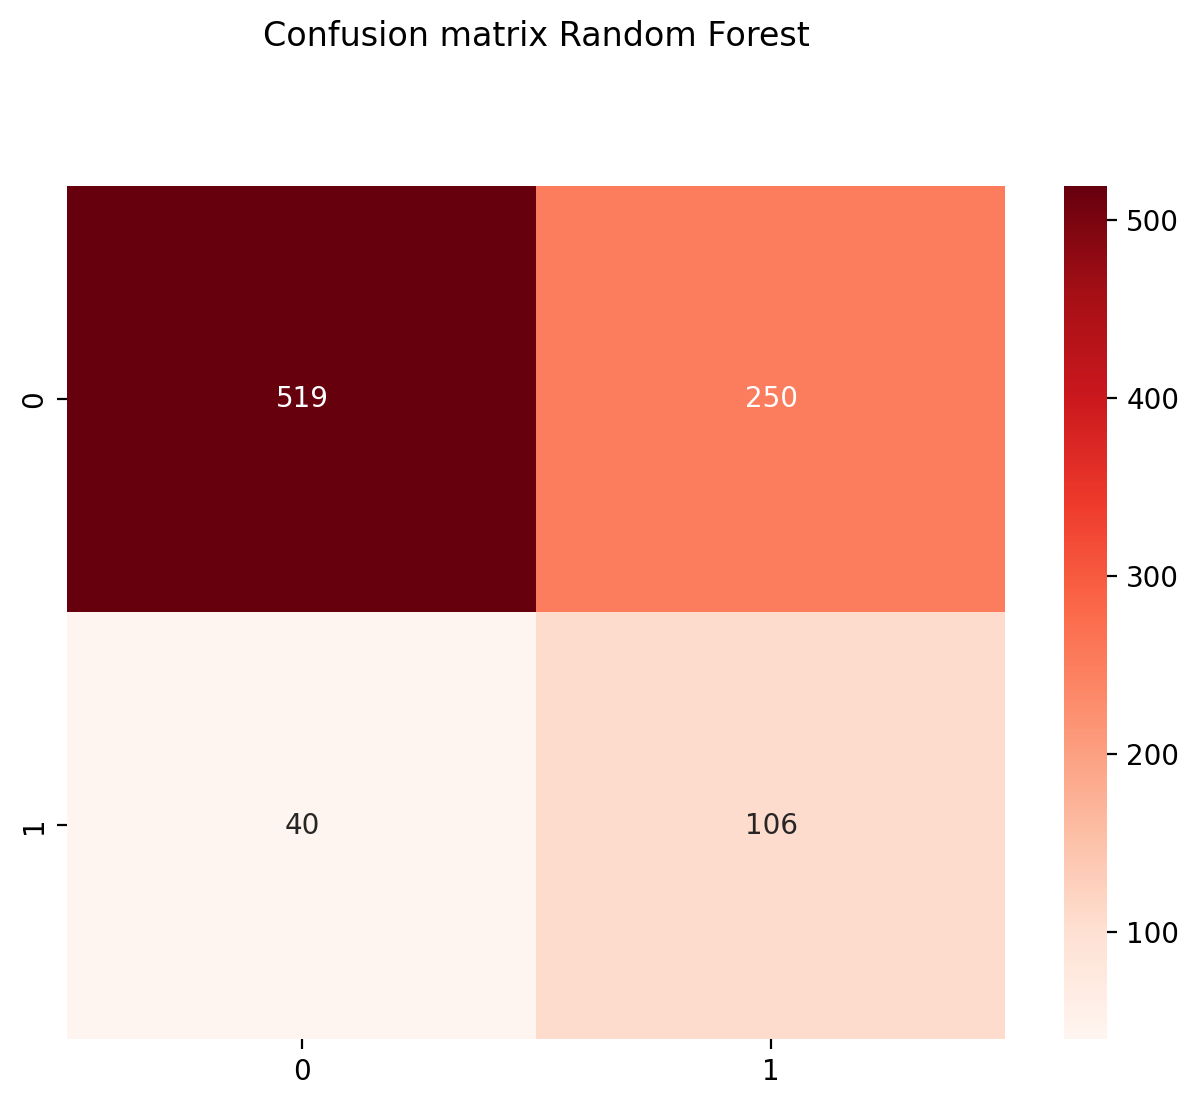

In [39]:
# plotting confusion matrix Random Forest

cnf_matrix_nb = confusion_matrix(y_test, normalized_df_rfc_pred)

sns.heatmap(pd.DataFrame(cnf_matrix_nb), annot=True, cmap="Reds" , fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix Random Forest\n', y=1.1)

# Ensemble of SVM and KNN models

VotingClassifier trains various base models and predicts on the basis of aggregating the findings of each estimator.

VotingClassifier(estimators=[('svc', SVC()),
                             ('knn', KNeighborsClassifier(n_neighbors=2))])

/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

The accuracy score for RF(Train data) is: 69.3%
The f1 score for RF(Train data) is: 52.5%
The precision score for RF(Train data) is: 100.0%
The recall score for RF(Train data) is: 35.5%
The accuracy score for RF(Test data) is: 85.6%
The f1 score for RF(Test data) is: 48.0%
The precision score for RF(Test data) is: 56.49999999999999%
The recall score for RF(Test data) is: 41.8%


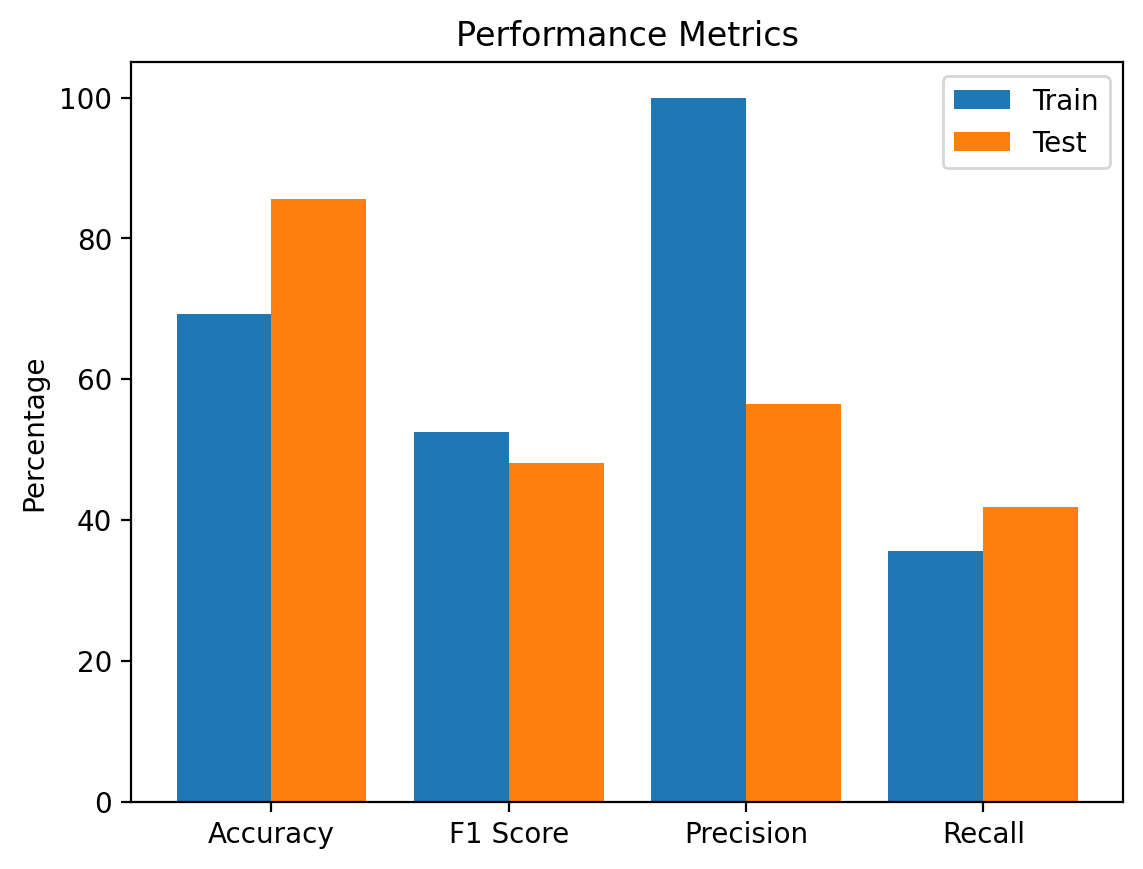

In [40]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import log_loss
# initializing all the model objects with default parameters
model_1 =  SVC()
model_2 = KNeighborsClassifier(n_neighbors = 2)
 
# Making the final model using voting classifier
final_model = VotingClassifier(
    estimators=[('svc', model_1), ('knn', model_2)], voting='hard')
 
# training all the model on the train dataset
final_model.fit(X_train, y_train)
 
# predicting the output on the test dataset
pred_final = final_model.predict(X_train)

# check accuracy: Accuracy: Overall, how often is the classifier correct? Accuracy = (True Pos + True Negative)/total
acc_train = accuracy_score(y_train, pred_final)
print(f"The accuracy score for RF(Train data) is: {round(acc_train,3)*100}%")

# f1 score: The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0.
f1_train = f1_score(y_train, pred_final)
print(f"The f1 score for RF(Train data) is: {round(f1_train,3)*100}%")

# Precision score: When it predicts yes, how often is it correct? Precision=True Positive/predicted yes
precision_train = precision_score(y_train, pred_final)
print(f"The precision score for RF(Train data) is: {round(precision_train,3)*100}%")

# recall score: True Positive Rate(Sensitivity or Recall): When it’s actually yes, how often does it predict yes? True Positive Rate = True Positive/actual yes
recall_train = recall_score(y_train, pred_final)
print(f"The recall score for RF(Train data) is: {round(recall_train,3)*100}%")



##### Performance Analysis on test data #####

pred_final = final_model.predict(X_test)


# check accuracy: Accuracy: Overall, how often is the classifier correct? Accuracy = (True Pos + True Negative)/total
acc_test = accuracy_score(y_test, pred_final)
print(f"The accuracy score for RF(Test data) is: {round(acc_test,3)*100}%")

# f1 score: The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0.
f1_test = f1_score(y_test, pred_final)
print(f"The f1 score for RF(Test data) is: {round(f1_test,3)*100}%")

# Precision score: When it predicts yes, how often is it correct? Precision=True Positive/predicted yes
precision_test = precision_score(y_test, pred_final)
print(f"The precision score for RF(Test data) is: {round(precision_test,3)*100}%")

# recall score: True Positive Rate(Sensitivity or Recall): When it’s actually yes, how often does it predict yes? True Positive Rate = True Positive/actual yes
recall_test = recall_score(y_test, pred_final)
print(f"The recall score for RF(Test data) is: {round(recall_test,3)*100}%")


y = [acc_train, f1_train, precision_train,recall_train]
z = [acc_test, f1_test, precision_test,recall_test]
final_metrics.append(z)

plotPairPlot(y,z)


<AxesSubplot:>

Text(0.5, 1.1, 'Confusion matrix SVM and KNN\n')

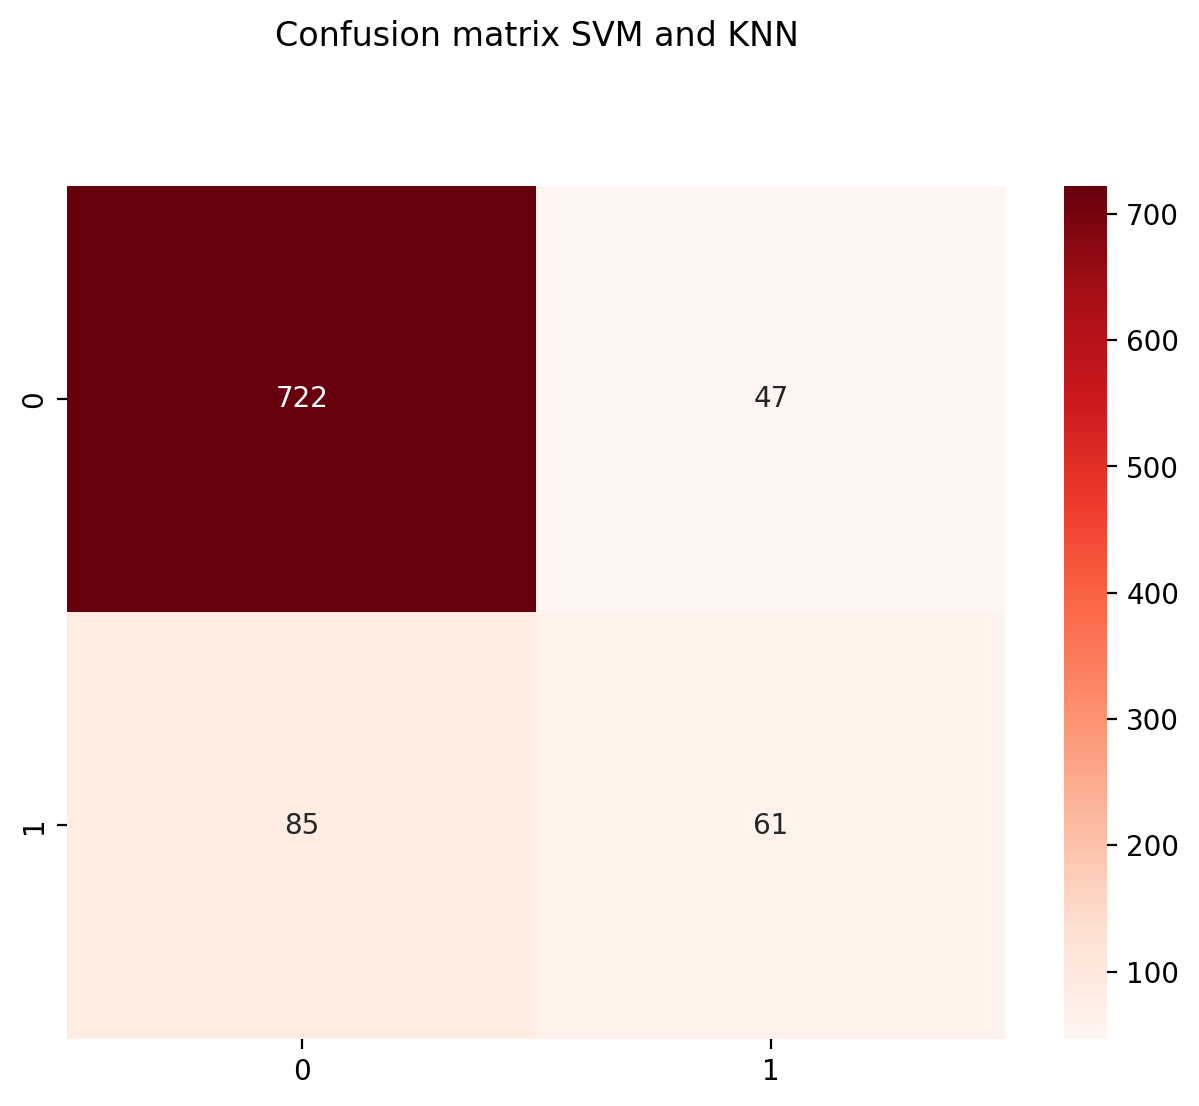

In [41]:
# plotting confusion matrix SVM and KNN ensembler

cnf_matrix_nb = confusion_matrix(y_test, pred_final)

sns.heatmap(pd.DataFrame(cnf_matrix_nb), annot=True, cmap="Reds" , fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix SVM and KNN\n', y=1.1)

# Results

,Accuracy,F1 score,Precision,Recall
Log Reg,67.540984,38.509317,27.596439,63.698630
Decision Tree,67.868852,47.500000,32.125604,91.095890
KNN,80.765027,47.928994,42.187500,55.479452
SVM,74.207650,41.293532,32.421875,56.849315
Naive Bayes,80.765027,35.294118,38.095238,32.876712
Random Forest,68.306011,42.231076,29.775281,72.602740
Ensemble SVM and KNN,85.573770,48.031496,56.481481,41.780822


<BarContainer object of 4 artists>

<BarContainer object of 4 artists>

<BarContainer object of 4 artists>

<BarContainer object of 4 artists>

<BarContainer object of 4 artists>

<BarContainer object of 4 artists>

<BarContainer object of 4 artists>

([<matplotlib.axis.XTick at 0x7fa8433bbca0>,
 [Text(0, 0, 'Accuracy'),
  Text(1, 0, 'F1 score'),
  Text(2, 0, 'Precision'),
  Text(3, 0, 'Recall')])

Text(0, 0.5, 'Percentage')

Text(0.5, 1.0, 'Performance Metrics')

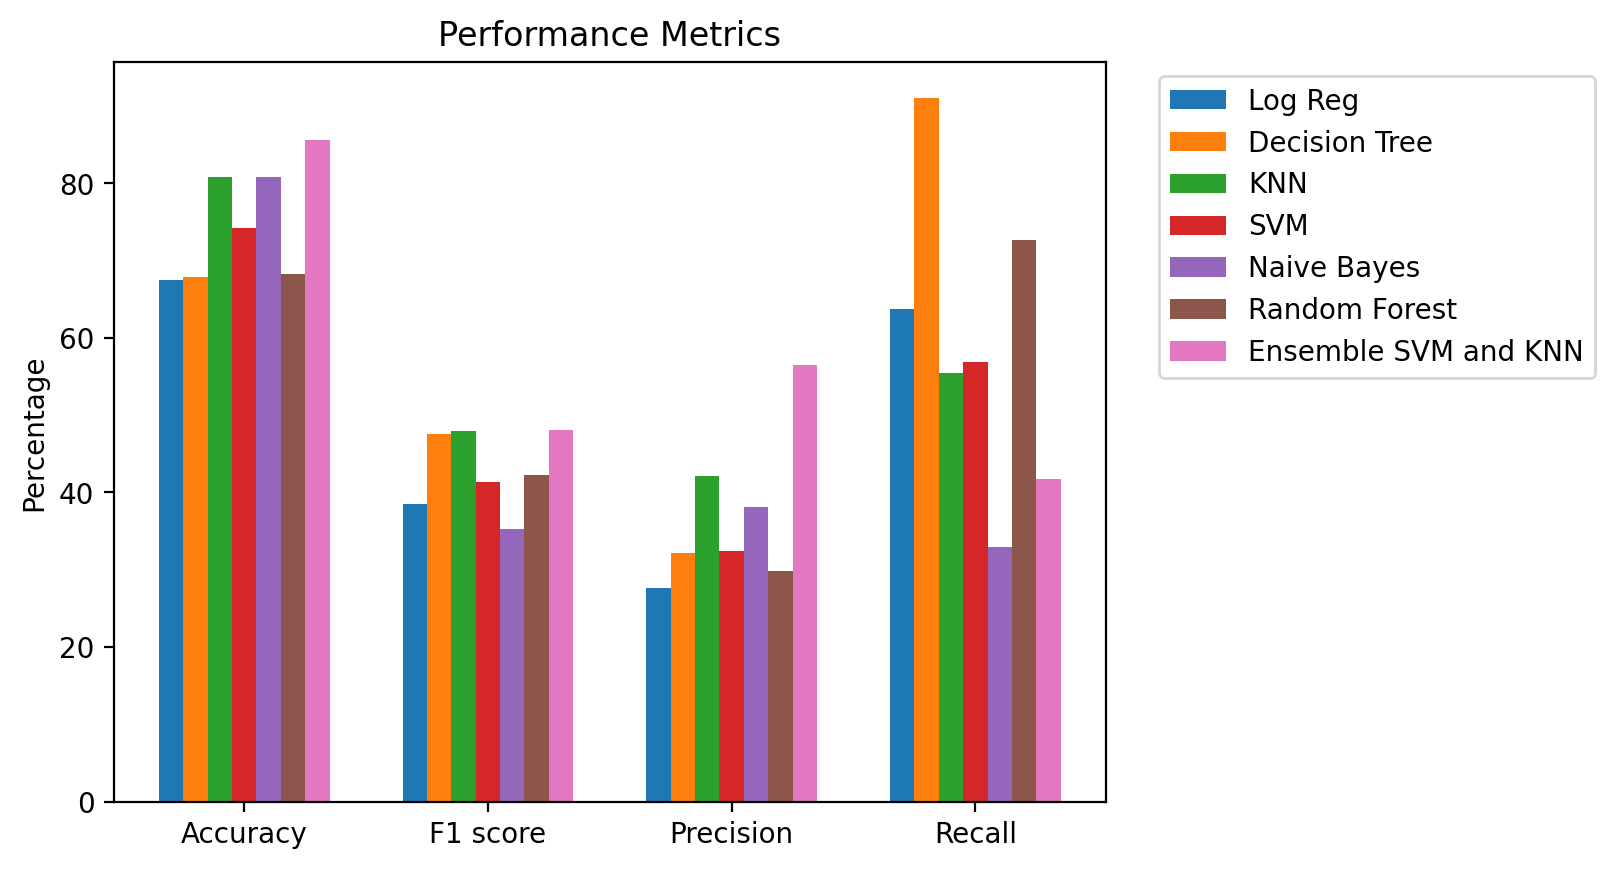

In [42]:
classifiers_list = ['Log Reg','Decision Tree','KNN','SVM','Naive Bayes','Random Forest','Ensemble SVM and KNN']
col_names = ['Accuracy','F1 score','Precision','Recall']
metric_df = pd.DataFrame(final_metrics,index=classifiers_list)
metric_df.columns =col_names
metric_df.multiply(100)
X = col_names
item1 = [item * 100 for item in final_metrics[0]]
item2 = [item * 100 for item in final_metrics[1]]
item3 = [item * 100 for item in final_metrics[2]]
item4 = [item * 100 for item in final_metrics[3]]
item5 = [item * 100 for item in final_metrics[4]]
item6 = [item * 100 for item in final_metrics[5]]
item7 = [item * 100 for item in final_metrics[6]]
X_axis = np.arange(len(X))
plt.bar(X_axis - 0.3, item1, 0.1, label = classifiers_list[0])
plt.bar(X_axis - 0.2, item2, 0.1, label = classifiers_list[1])
plt.bar(X_axis - 0.1, item3, 0.1, label = classifiers_list[2])
plt.bar(X_axis - 0,  item4, 0.1, label = classifiers_list[3])
plt.bar(X_axis + 0.1, item5, 0.1, label = classifiers_list[4])
plt.bar(X_axis + 0.2, item6, 0.1, label = classifiers_list[5])
plt.bar(X_axis + 0.3, item7, 0.1, label = classifiers_list[6])
plt.xticks(X_axis, X)
plt.ylabel("Percentage")
plt.title("Performance Metrics")
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.show()


# Conclusion

Based on the above results, we can see that the decision tree has highest recall value compared to other models. In this model we are focusing on recall because we need to minimize the amount of actual positive and predicted negative cases.

In [43]:
# Perform cross validation
'''Cross Validation is used to assess the predictive performance of the models and and to judge 
how they perform outside the sample to a new data set'''

X = df.iloc[:,0:14] 
y = df.iloc[:,-1]

cv_results = cross_val_score(dtc_up_5, X, y, cv=5) 

print ("Cross-validated scores:", cv_results)
print("The Accuracy of Model with Cross Validation is: {0:.2f}%".format(cv_results.mean() * 100))

'Cross Validation is used to assess the predictive performance of the models and and to judge \nhow they perform outside the sample to a new data set'

Cross-validated scores: [0.83060109 0.82923497 0.84289617 0.85636115 0.83173735]
The Accuracy of Model with Cross Validation is: 83.82%


"the AUC ROC Curve is a measure of performance based on plotting the true positive and false positive rate \nand calculating the area under that curve.The closer the score to 1 the better the algorithm's ability to \ndistinguish between the two outcome classes."

Text(0.5, 1.0, 'ROC CURVE Decison Tree')

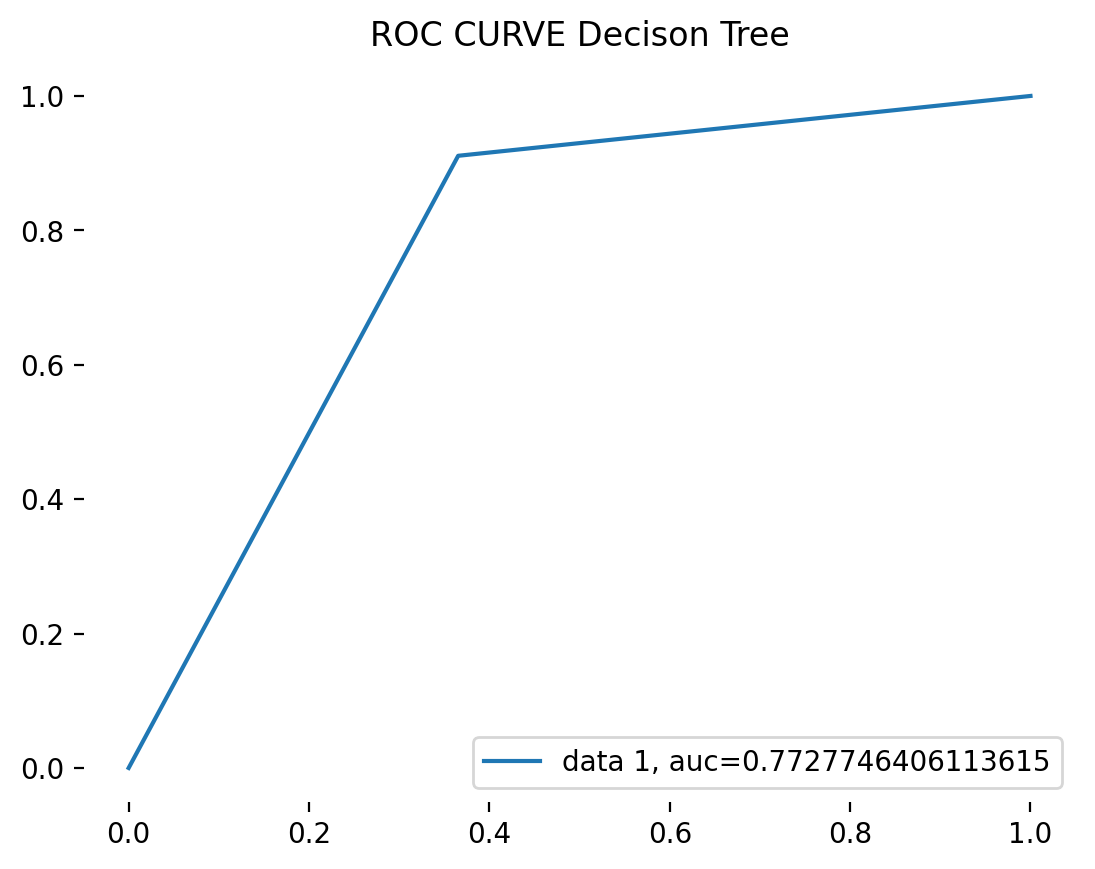

The score for the AUC ROC Curve is: 77.3%


In [44]:
# AU ROC CURVE Decision tree
'''the AUC ROC Curve is a measure of performance based on plotting the true positive and false positive rate 
and calculating the area under that curve.The closer the score to 1 the better the algorithm's ability to 
distinguish between the two outcome classes.'''

fpr, tpr, _ = roc_curve(y_test, normalized_df_dtc_pred_5)
auc = roc_auc_score(y_test, normalized_df_dtc_pred_5)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.box(False)
plt.title ('ROC CURVE Decison Tree')
plt.show()

print(f"The score for the AUC ROC Curve is: {round(auc,3)*100}%")

# Applying the Model

In [ ]:
def start_questionnaire():
    my_predictors = []
    parameters = ['male','age','currentSmoker','cigsPerDay','BPMeds','prevalentStroke','prevalentHyp','diabetes','totChol','sysBP','diaBP','BMI','heartRate','glucose']
  
    print('Input Patient Information:')
    
    age = input("Patient's age: >>> ") 
    my_predictors.append(age)
    male = input("Patient's gender. male=1, female=0: >>> ") 
    my_predictors.append(male)
    cigsPerDay = input("Patient's smoked cigarettes per day: >>> ") 
    my_predictors.append(cigsPerDay)
    sysBP = input("Patient's systolic blood pressure: >>> ") 
    my_predictors.append(sysBP)
    diaBP = input("Patient's diastolic blood pressure: >>> ")
    my_predictors.append(diaBP)
    totChol = input("Patient's cholesterin level: >>> ") 
    my_predictors.append(totChol)
    prevalentHyp = input("Was Patient hypertensive? Yes=1, No=0 >>> ") 
    my_predictors.append(prevalentHyp)
    diabetes = input("Did Patient have diabetes? Yes=1, No=0 >>> ") 
    my_predictors.append(diabetes)
    glucose = input("What is the Patient's glucose level? >>> ") 
    my_predictors.append(diabetes)
    BPMeds = input("Has Patient been on Blood Pressure Medication? Yes=1, No=0 >>> ")
    my_predictors.append(BPMeds)
    currentSmoker = input("Is Patient a current smoker? Yes=1, No=0 >>> ")
    my_predictors.append(currentSmoker)
    heartRate = input("What is Patient's heart rate? >>> ")
    my_predictors.append(heartRate)
    prevalentStroke = input("Has Patient suffered a heart stroke? Yes=1, No=0 >>> ")
    my_predictors.append(prevalentStroke)
    BMI = input("What is Pateint's BMI? >>> ")
    my_predictors.append(BMI)
    
    my_data = dict(zip(parameters, my_predictors))
    my_df = pd.DataFrame(my_data, index=[0])
   
    # assign scaler to column:
    my_y_pred = dtc_up_5.predict(my_df)
    my_y_pred
    print('\n')
    print('Result:')
    if my_y_pred == 1:
        print("The patient will develop a Heart Disease.")
    if my_y_pred == 0:
        print("The patient will not develop a Heart Disease.")
        
start_questionnaire()

Input Patient Information:
